<p style="font-weight: bold; font-size: 26px; text-transform: uppercase;">Traitement des données</p>

# Référence

## Librairies nécessaires

In [1]:
%pip install seaborn matplotlib pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import seaborn as sns
import os
import matplotlib.pyplot as plt
import pandas as pd

## Préparations des données

### Chargement des données CSV dans un Dataframe

In [3]:
chemin_fichier = "../input/Indicateur_reference.csv"
if os.path.exists(chemin_fichier):
    print("Le fichier existe bien :", os.path.abspath(chemin_fichier))
else:
    print("Le fichier est introuvable. Vérifiez le chemin :", os.path.abspath(chemin_fichier))


# Chargez le fichier CSV avec un séparateur tabulation et ajoutez les en-têtes définis dans 'colonnes'
df_ref = pd.read_csv(chemin_fichier, sep=';', encoding='utf-8', skip_blank_lines=True, header=48)

# Supprimer les 83 premières lignes
df_ref = df_ref.iloc[47:]

# Réinitialiser les index après avoir supprimé les lignes
df_ref.reset_index(drop=True, inplace=True)

# Afficher le DataFrame proprement
df_ref

Le fichier existe bien : /workspaces/R6.01 - Climato SIG/input/Indicateur_reference.csv


# Identifiant                  Libelle Altitude Contexte   Annee   TAV  \
0          1010600         ALPES : Chablais    600 m      REF  1997.0  3.30   
1          1010600         ALPES : Chablais    600 m      REF  1998.0  3.71   
2          1010600         ALPES : Chablais    600 m      REF  1999.0  3.74   
3          1010600         ALPES : Chablais    600 m      REF  2000.0  4.07   
4          1010600         ALPES : Chablais    600 m      REF  2001.0  3.63   
...            ...                      ...      ...      ...     ...   ...   
3909       1113300  ALPES : Haute-Maurienne   3300 m      REF  2001.0 -8.71   
3910       1113300  ALPES : Haute-Maurienne   3300 m      REF  2002.0 -8.14   
3911       1113300  ALPES : Haute-Maurienne   3300 m      REF  2003.0 -9.08   
3912       1113300  ALPES : Haute-Maurienne   3300 m      REF  2004.0 -8.58   
3913       1113300  ALPES : Haute-Maurienne   3300 m      REF  2005.0 -8.50   

       TNAV  TXAV   SD  TXND  ...  PXCDD   PINT  RRSN   SNDAV   SND5  SND50  \
0     -0.38  6.98  0.0  21.0  ...   22.0   8.42  0.21    8.21   71.0    0.0   
1      0.29  7.14  0.0  17.0  ...   21.0  10.83  0.15    2.60   41.0    0.0   
2     -0.13  7.61  0.0  15.0  ...   25.0  10.32  0.09    0.84   18.0    0.0   
3      0.28  7.85  0.0  22.0  ...   17.0   7.63  0.12    1.13    9.0    0.0   
4      0.17  7.09  0.0  22.0  ...   15.0  10.74  0.10    0.49    6.0    0.0   
...     ...   ...  ...   ...  ...    ...    ...   ...     ...    ...    ...   
3909 -11.22 -6.20  0.0  20.0  ...   16.0  10.35  1.00  178.28  181.0  181.0   
3910 -10.66 -5.61  0.0  21.0  ...   18.0   6.62  1.00  137.28  181.0  181.0   
3911 -11.81 -6.35  0.0  15.0  ...   26.0   8.57  1.00  162.51  181.0  176.0   
3912 -11.19 -5.96  0.0  12.0  ...   12.0  13.23  1.00  205.15  182.0  182.0   
3913 -11.19 -5.81  0.0  12.0  ...   28.0   8.14  1.00  114.50  181.0  177.0   

      SND100      SWE      SWEDAT  Unnamed: 37  
0        0.0    91.73  19970200.0          NaN  
1        0.0    58.25  19980208.0          NaN  
2        0.0    24.45  19981222.0          NaN  
3        0.0    32.23  20000304.0          NaN  
4        0.0    31.37  20010128.0          NaN  
...      ...      ...         ...          ...  
3909   172.0   761.32  20010430.0          NaN  
3910   142.0   543.01  20020430.0          NaN  
3911   171.0   690.38  20030430.0          NaN  
3912   160.0  1136.93  20040428.0          NaN  
3913   127.0   429.33  20050428.0          NaN  

[3914 rows x 38 columns]

### Regrouper les années par intervalles de 10 ans

In [4]:
# Si la colonne 'Annee' est de type datetime, nous devons extraire l'année sous forme d'entier
if pd.api.types.is_datetime64_any_dtype(df_ref['Annee']):
    df_ref['Annee'] = df_ref['Annee'].dt.year

# Suppression du préfixe "Alpes : "
df_ref['Libelle'] = df_ref['Libelle'].str.replace(r"^ALPES : ", "", regex=True)

# Filtrer les données où la colonne 'Altitude > 1200m
df_filtered = df_ref[df_ref['Altitude'] >= '1200 m']

# Créer une nouvelle colonne 'Annee_group' pour regrouper les années par intervalles de 10 ans
df_filtered['Annee_group'] = (df_filtered['Annee'] // 10) * 10

df_filtered

# Identifiant          Libelle Altitude Contexte   Annee   TAV   TNAV  \
0          1010600         Chablais    600 m      REF  1997.0  3.30  -0.38   
1          1010600         Chablais    600 m      REF  1998.0  3.71   0.29   
2          1010600         Chablais    600 m      REF  1999.0  3.74  -0.13   
3          1010600         Chablais    600 m      REF  2000.0  4.07   0.28   
4          1010600         Chablais    600 m      REF  2001.0  3.63   0.17   
...            ...              ...      ...      ...     ...   ...    ...   
3909       1113300  Haute-Maurienne   3300 m      REF  2001.0 -8.71 -11.22   
3910       1113300  Haute-Maurienne   3300 m      REF  2002.0 -8.14 -10.66   
3911       1113300  Haute-Maurienne   3300 m      REF  2003.0 -9.08 -11.81   
3912       1113300  Haute-Maurienne   3300 m      REF  2004.0 -8.58 -11.19   
3913       1113300  Haute-Maurienne   3300 m      REF  2005.0 -8.50 -11.19   

      TXAV   SD  TXND  ...   PINT  RRSN   SNDAV   SND5  SND50  SND100  \
0     6.98  0.0  21.0  ...   8.42  0.21    8.21   71.0    0.0     0.0   
1     7.14  0.0  17.0  ...  10.83  0.15    2.60   41.0    0.0     0.0   
2     7.61  0.0  15.0  ...  10.32  0.09    0.84   18.0    0.0     0.0   
3     7.85  0.0  22.0  ...   7.63  0.12    1.13    9.0    0.0     0.0   
4     7.09  0.0  22.0  ...  10.74  0.10    0.49    6.0    0.0     0.0   
...    ...  ...   ...  ...    ...   ...     ...    ...    ...     ...   
3909 -6.20  0.0  20.0  ...  10.35  1.00  178.28  181.0  181.0   172.0   
3910 -5.61  0.0  21.0  ...   6.62  1.00  137.28  181.0  181.0   142.0   
3911 -6.35  0.0  15.0  ...   8.57  1.00  162.51  181.0  176.0   171.0   
3912 -5.96  0.0  12.0  ...  13.23  1.00  205.15  182.0  182.0   160.0   
3913 -5.81  0.0  12.0  ...   8.14  1.00  114.50  181.0  177.0   127.0   

          SWE      SWEDAT  Unnamed: 37  Annee_group  
0       91.73  19970200.0          NaN       1990.0  
1       58.25  19980208.0          NaN       1990.0  
2       24.45  19981222.0          NaN       1990.0  
3       32.23  20000304.0          NaN       2000.0  
4       31.37  20010128.0          NaN       2000.0  
...       ...         ...          ...          ...  
3909   761.32  20010430.0          NaN       2000.0  
3910   543.01  20020430.0          NaN       2000.0  
3911   690.38  20030430.0          NaN       2000.0  
3912  1136.93  20040428.0          NaN       2000.0  
3913   429.33  20050428.0          NaN       2000.0  

[3914 rows x 39 columns]

## Epaiseeur de neige

### Regrouper des données par groupe d'année et calcule de la moyenne

In [5]:
# Regrouper les données par la colonne 'Annee_group' et 'Libelle' et calculer la moyenne de 'SNDAV'
df_grouped = df_filtered.groupby(['Annee_group', 'Libelle'])['SNDAV'].mean().reset_index()
df_grouped

Annee_group           Libelle       SNDAV
0        1950.0            Aravis  114.506190
1        1950.0            Bauges   79.416481
2        1950.0       Beaufortain  121.652222
3        1950.0          Chablais  116.671905
4        1950.0   Haute-Maurienne   79.299167
5        1950.0  Haute-Tarentaise  104.011481
6        1950.0         Maurienne   94.540000
7        1950.0        Mont-Blanc  162.519444
8        1950.0           Vanoise  110.674074
9        1960.0            Aravis  100.605286
10       1960.0            Bauges   72.143000
11       1960.0       Beaufortain  105.716250
12       1960.0          Chablais  101.196143
13       1960.0   Haute-Maurienne   76.494375
14       1960.0  Haute-Tarentaise   92.683778
15       1960.0         Maurienne   81.665000
16       1960.0        Mont-Blanc  143.007375
17       1960.0           Vanoise  101.140444
18       1970.0            Aravis  106.657571
19       1970.0            Bauges   67.439667
20       1970.0       Beaufortain  107.382625
21       1970.0          Chablais  106.735714
22       1970.0   Haute-Maurienne   77.015375
23       1970.0  Haute-Tarentaise   95.065667
24       1970.0         Maurienne   90.566556
25       1970.0        Mont-Blanc  144.439375
26       1970.0           Vanoise  105.601444
27       1980.0            Aravis  115.891143
28       1980.0            Bauges   77.676833
29       1980.0       Beaufortain  116.114375
30       1980.0          Chablais  112.249143
31       1980.0   Haute-Maurienne   78.281125
32       1980.0  Haute-Tarentaise  107.872111
33       1980.0         Maurienne   96.653778
34       1980.0        Mont-Blanc  160.325250
35       1980.0           Vanoise  107.923556
36       1990.0            Aravis  108.872000
37       1990.0            Bauges   66.046667
38       1990.0       Beaufortain  110.780125
39       1990.0          Chablais  102.121644
40       1990.0   Haute-Maurienne   78.051625
41       1990.0  Haute-Tarentaise  100.958111
42       1990.0         Maurienne   83.710222
43       1990.0        Mont-Blanc  154.265250
44       1990.0           Vanoise   99.910000
45       2000.0            Aravis  105.143333
46       2000.0            Bauges   64.171667
47       2000.0       Beaufortain  107.944583
48       2000.0          Chablais   84.658750
49       2000.0   Haute-Maurienne   81.372708
50       2000.0  Haute-Tarentaise   93.649259
51       2000.0         Maurienne   83.531111
52       2000.0        Mont-Blanc  144.987917
53       2000.0           Vanoise  102.340185

### Graphique

Graphique sauvegardée dans ../export/Graphique_reference/epaisseur_moyen_reference.png


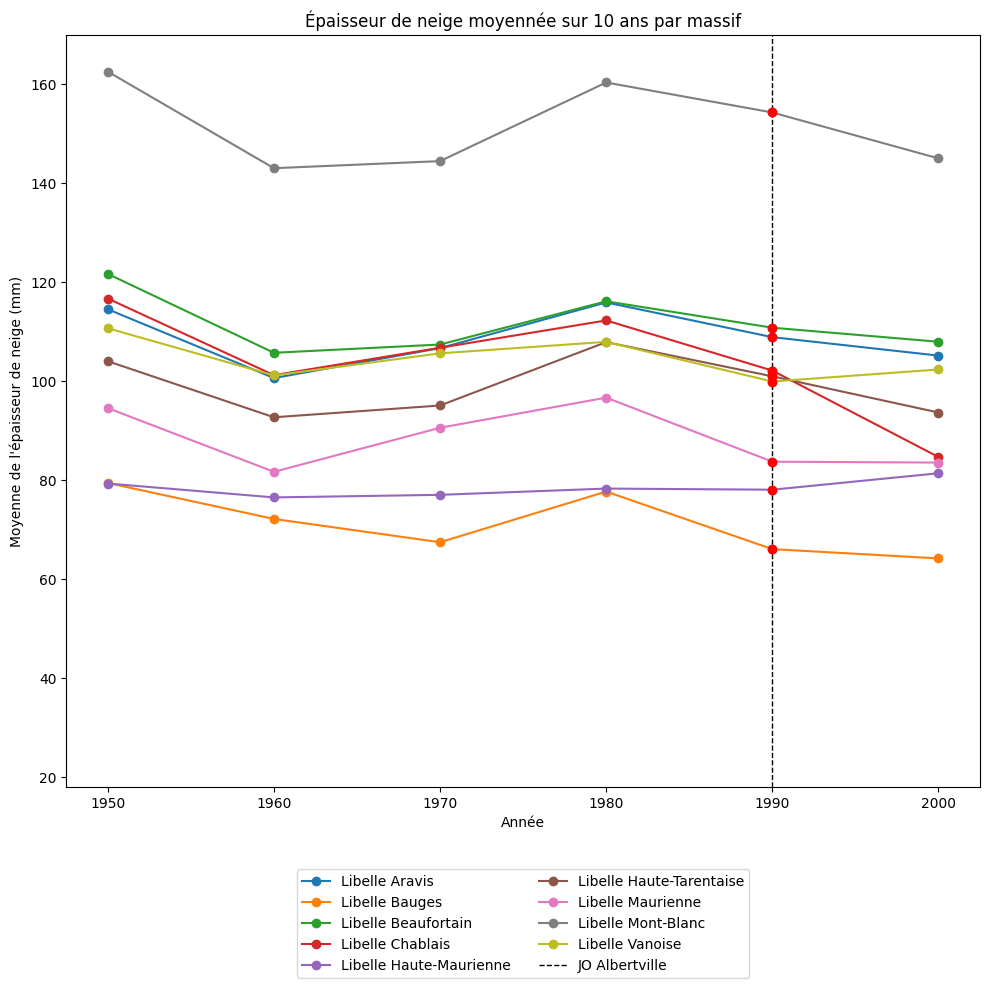

In [6]:
# Tracer le graphique
plt.figure(figsize=(10, 10))

# Tracer les courbes pour chaque libellé
for libelle in df_grouped['Libelle'].unique():
    libelle_data = df_grouped[df_grouped['Libelle'] == libelle]
    plt.plot(libelle_data['Annee_group'], libelle_data['SNDAV'], label=f'Libelle {libelle}', marker='o')

    # Filtrer les données pour l'année 1990 pour chaque libellé
    data_1990 = libelle_data[libelle_data['Annee_group'] == 1990]

    # Vérifier si des données existent pour 1990
    if not data_1990.empty:  
        plt.scatter(data_1990['Annee_group'], data_1990['SNDAV'], color='red', label=None, zorder=5)

# Ajouter une ligne verticale en pointillée pour l'année 2030
plt.axvline(x=1990, color='black', linestyle='--', linewidth=1, label="JO Albertville")

# Ajouter des labels et un titre
plt.xlabel('Année')
plt.ylabel('Moyenne de l\'épaisseur de neige (mm)')
plt.title('Épaisseur de neige moyennée sur 10 ans par massif')

# Ajouter une légende
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

# Paramétrage des ordonnées pour qu'il corresponde aux valeurs du graph de référence
plt.ylim(18, 170)

# Ajuster la mise en page
plt.tight_layout()

# Définir le chemin de sauvegarde (non caché)
output_dir = "../export/Graphique_reference"
os.makedirs(output_dir, exist_ok=True)  # Crée le dossier et ses parents si nécessaire

# Chemin complet pour enregistrer le fichier png
output_path = os.path.join(output_dir, "epaisseur_moyen_reference.png")

try:
    # Enregistrer la figure au format png
    plt.savefig(output_path, format='png', dpi=300, bbox_inches="tight")
    print(f"Graphique sauvegardée dans {output_path}")
except Exception as e:
    print(f"Erreur lors de la sauvegarde du graphique: {e}")

# Afficher le graphique
plt.show()

## Temperature moyenne

### Regrouper des données par groupe d'année et calcule de la moyenne

In [7]:
# Regrouper les données par la colonne 'Annee_group' et 'Libelle' et calculer la moyenne de 'SNDAV'
df_grouped = df_filtered.groupby(['Annee_group', 'Libelle'])['TAV'].mean().reset_index()
df_grouped

Annee_group           Libelle       TAV
0        1950.0            Aravis -1.484762
1        1950.0            Bauges  0.328148
2        1950.0       Beaufortain -2.277778
3        1950.0          Chablais -1.587619
4        1950.0   Haute-Maurienne -3.874028
5        1950.0  Haute-Tarentaise -3.253457
6        1950.0         Maurienne -1.342099
7        1950.0        Mont-Blanc -3.869306
8        1950.0           Vanoise -3.117407
9        1960.0            Aravis -1.514286
10       1960.0            Bauges  0.238833
11       1960.0       Beaufortain -2.393125
12       1960.0          Chablais -1.594857
13       1960.0   Haute-Maurienne -3.959875
14       1960.0  Haute-Tarentaise -3.213556
15       1960.0         Maurienne -1.252333
16       1960.0        Mont-Blanc -3.873125
17       1960.0           Vanoise -3.146667
18       1970.0            Aravis -1.147429
19       1970.0            Bauges  0.674833
20       1970.0       Beaufortain -1.886500
21       1970.0          Chablais -1.361571
22       1970.0   Haute-Maurienne -3.444625
23       1970.0  Haute-Tarentaise -2.818667
24       1970.0         Maurienne -1.049889
25       1970.0        Mont-Blanc -3.523625
26       1970.0           Vanoise -2.793111
27       1980.0            Aravis -1.583857
28       1980.0            Bauges  0.090833
29       1980.0       Beaufortain -2.419125
30       1980.0          Chablais -1.679286
31       1980.0   Haute-Maurienne -3.941750
32       1980.0  Haute-Tarentaise -3.311667
33       1980.0         Maurienne -1.400667
34       1980.0        Mont-Blanc -3.973000
35       1980.0           Vanoise -3.215111
36       1990.0            Aravis -1.441571
37       1990.0            Bauges  0.337500
38       1990.0       Beaufortain -2.305625
39       1990.0          Chablais -1.333699
40       1990.0   Haute-Maurienne -3.726500
41       1990.0  Haute-Tarentaise -3.096333
42       1990.0         Maurienne -1.161222
43       1990.0        Mont-Blanc -3.826625
44       1990.0           Vanoise -3.014333
45       2000.0            Aravis -1.122857
46       2000.0            Bauges  0.792500
47       2000.0       Beaufortain -1.781667
48       2000.0          Chablais -0.596875
49       2000.0   Haute-Maurienne -3.499375
50       2000.0  Haute-Tarentaise -2.796481
51       2000.0         Maurienne -0.797407
52       2000.0        Mont-Blanc -3.411250
53       2000.0           Vanoise -2.621111

### Graphique

Graphique sauvegardée dans ../export/Graphique_reference/temperature_moyenne_reference.png


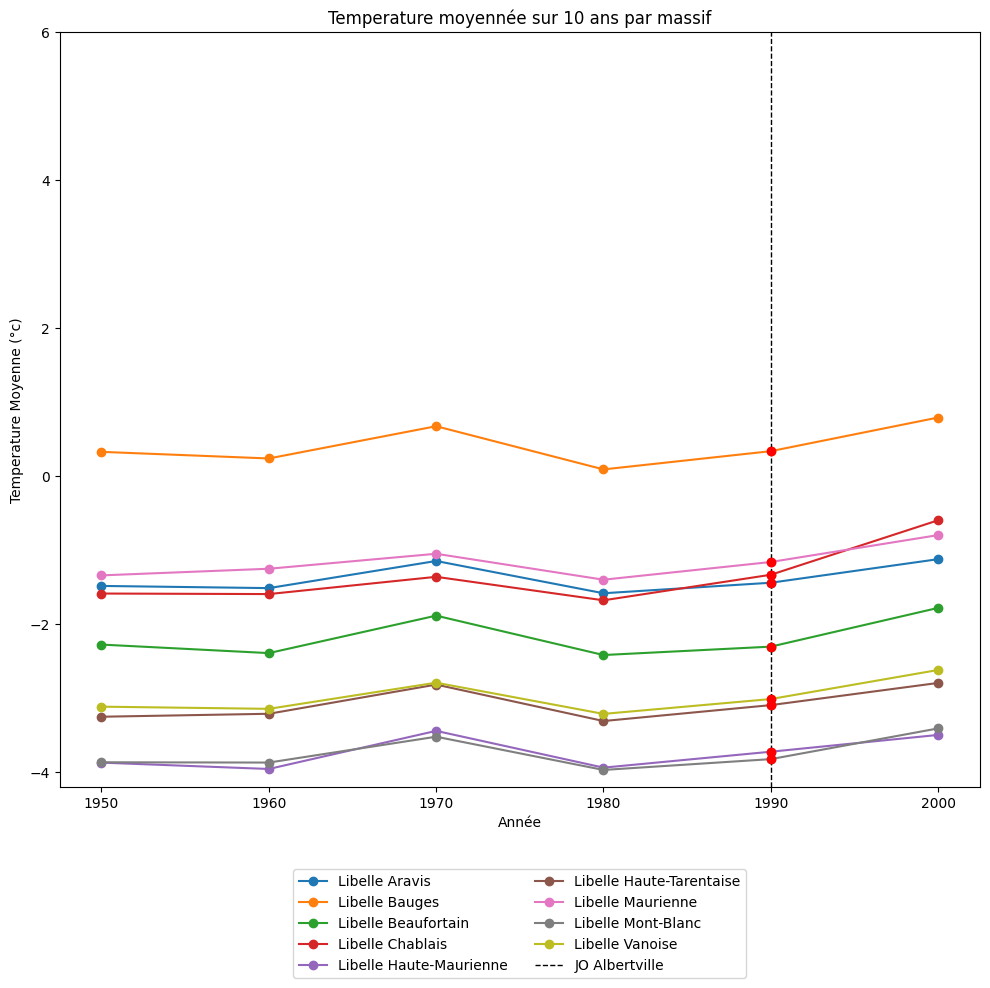

In [8]:
# Tracer le graphique
plt.figure(figsize=(10, 10))

# Tracer les courbes pour chaque libellé
for libelle in df_grouped['Libelle'].unique():
    libelle_data = df_grouped[df_grouped['Libelle'] == libelle]
    plt.plot(libelle_data['Annee_group'], libelle_data['TAV'], label=f'Libelle {libelle}', marker='o')

    # Filtrer les données pour l'année 1990 pour chaque libellé
    data_1990 = libelle_data[libelle_data['Annee_group'] == 1990]

    # Vérifier si des données existent pour 1990
    if not data_1990.empty:  
        plt.scatter(data_1990['Annee_group'], data_1990['TAV'], color='red', label=None, zorder=5)

# Ajouter une ligne verticale en pointillée pour l'année 2030
plt.axvline(x=1990, color='black', linestyle='--', linewidth=1, label="JO Albertville")

# Ajouter des labels et un titre
plt.xlabel('Année')
plt.ylabel('Temperature Moyenne (°c)')
plt.title('Temperature moyennée sur 10 ans par massif')

# Ajouter une légende
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

# Paramétrage des ordonnées pour qu'il corresponde aux valeurs du graph de référence
plt.ylim(-4.2, 6)

# Ajuster la mise en page
plt.tight_layout()

# Définir le chemin de sauvegarde (non caché)
output_dir = "../export/Graphique_reference"
os.makedirs(output_dir, exist_ok=True)  # Crée le dossier et ses parents si nécessaire

# Chemin complet pour enregistrer le fichier png
output_path = os.path.join(output_dir, "temperature_moyenne_reference.png")

try:
    # Enregistrer la figure au format png
    plt.savefig(output_path, format='png', dpi=300, bbox_inches="tight")
    print(f"Graphique sauvegardée dans {output_path}")
except Exception as e:
    print(f"Erreur lors de la sauvegarde du graphique: {e}")

# Afficher le graphique
plt.show()

## Nombre de jour moyen de givre

### Regrouper des données par groupe d'année et calcule de la moyenne

In [9]:
# Regrouper les données par la colonne 'Annee_group' et 'Libelle' et calculer la moyenne de 'SNDAV'
df_grouped = df_filtered.groupby(['Annee_group', 'Libelle'])['TNFD'].mean().reset_index()
df_grouped

Annee_group           Libelle        TNFD
0        1950.0            Aravis  150.857143
1        1950.0            Bauges  135.388889
2        1950.0       Beaufortain  156.347222
3        1950.0          Chablais  151.603175
4        1950.0   Haute-Maurienne  167.250000
5        1950.0  Haute-Tarentaise  161.987654
6        1950.0         Maurienne  147.049383
7        1950.0        Mont-Blanc  165.666667
8        1950.0           Vanoise  161.604938
9        1960.0            Aravis  150.742857
10       1960.0            Bauges  138.200000
11       1960.0       Beaufortain  157.112500
12       1960.0          Chablais  153.014286
13       1960.0   Haute-Maurienne  167.687500
14       1960.0  Haute-Tarentaise  160.566667
15       1960.0         Maurienne  148.044444
16       1960.0        Mont-Blanc  164.887500
17       1960.0           Vanoise  161.377778
18       1970.0            Aravis  148.200000
19       1970.0            Bauges  132.533333
20       1970.0       Beaufortain  152.312500
21       1970.0          Chablais  150.400000
22       1970.0   Haute-Maurienne  165.225000
23       1970.0  Haute-Tarentaise  159.655556
24       1970.0         Maurienne  145.600000
25       1970.0        Mont-Blanc  162.937500
26       1970.0           Vanoise  158.877778
27       1980.0            Aravis  151.828571
28       1980.0            Bauges  138.766667
29       1980.0       Beaufortain  155.787500
30       1980.0          Chablais  152.314286
31       1980.0   Haute-Maurienne  167.325000
32       1980.0  Haute-Tarentaise  162.622222
33       1980.0         Maurienne  147.333333
34       1980.0        Mont-Blanc  165.862500
35       1980.0           Vanoise  160.822222
36       1990.0            Aravis  148.142857
37       1990.0            Bauges  132.666667
38       1990.0       Beaufortain  154.250000
39       1990.0          Chablais  146.986301
40       1990.0   Haute-Maurienne  166.325000
41       1990.0  Haute-Tarentaise  159.077778
42       1990.0         Maurienne  144.277778
43       1990.0        Mont-Blanc  163.175000
44       1990.0           Vanoise  158.622222
45       2000.0            Aravis  148.142857
46       2000.0            Bauges  131.833333
47       2000.0       Beaufortain  152.166667
48       2000.0          Chablais  141.020833
49       2000.0   Haute-Maurienne  166.875000
50       2000.0  Haute-Tarentaise  160.407407
51       2000.0         Maurienne  143.074074
52       2000.0        Mont-Blanc  163.562500
53       2000.0           Vanoise  157.629630

### Graphique

Graphique sauvegardée dans ../export/Graphique_reference/Nombre_jour_moyen_reference.png


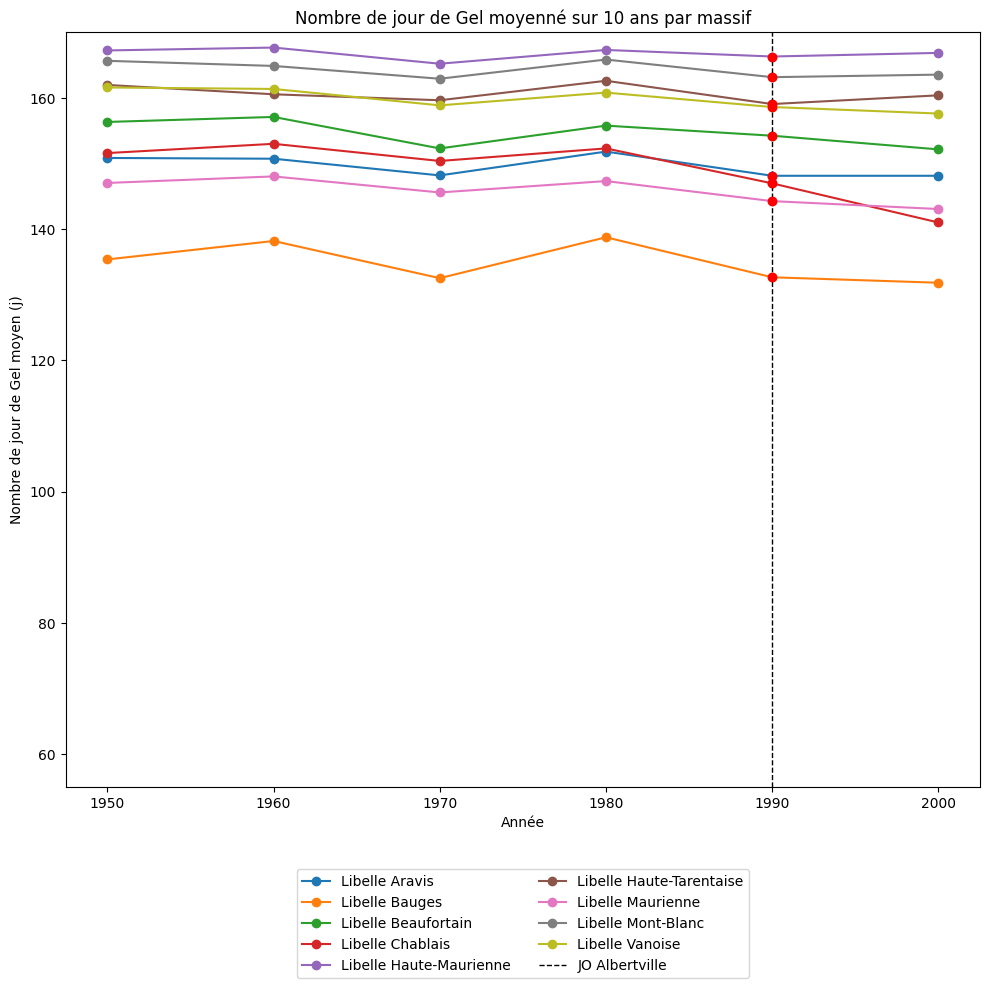

In [10]:
# Tracer le graphique
plt.figure(figsize=(10, 10))

# Tracer les courbes pour chaque libellé
for libelle in df_grouped['Libelle'].unique():
    libelle_data = df_grouped[df_grouped['Libelle'] == libelle]
    plt.plot(libelle_data['Annee_group'], libelle_data['TNFD'], label=f'Libelle {libelle}', marker='o')

    # Filtrer les données pour l'année 1990 pour chaque libellé
    data_1990 = libelle_data[libelle_data['Annee_group'] == 1990]

    # Vérifier si des données existent pour 1990
    if not data_1990.empty:  
        plt.scatter(data_1990['Annee_group'], data_1990['TNFD'], color='red', label=None, zorder=5)

# Ajouter une ligne verticale en pointillée pour l'année 2030
plt.axvline(x=1990, color='black', linestyle='--', linewidth=1, label="JO Albertville")

# Ajouter des labels et un titre
plt.xlabel('Année')
plt.ylabel('Nombre de jour de Gel moyen (j)')
plt.title('Nombre de jour de Gel moyenné sur 10 ans par massif')

# Ajouter une légende
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

# Paramétrage des ordonnées pour qu'il corresponde aux valeurs du graph de référence
plt.ylim(55, 170)


# Ajuster la mise en page
plt.tight_layout()

# Définir le chemin de sauvegarde (non caché)
output_dir = "../export/Graphique_reference"
os.makedirs(output_dir, exist_ok=True)  # Crée le dossier et ses parents si nécessaire

# Chemin complet pour enregistrer le fichier png
output_path = os.path.join(output_dir, "Nombre_jour_moyen_reference.png")

try:
    # Enregistrer la figure au format png
    plt.savefig(output_path, format='png', dpi=300, bbox_inches="tight")
    print(f"Graphique sauvegardée dans {output_path}")
except Exception as e:
    print(f"Erreur lors de la sauvegarde du graphique: {e}")

# Afficher le graphique
plt.show()

## Matrice

### Cumul de neige par année et tranche d'altitude

In [11]:
# Vérifier les types de données et convertir si nécessaire
df_ref['Annee'] = pd.to_numeric(df_ref['Annee'], errors='coerce')  # Convertir en numérique si nécessaire
df_ref['SNDAV'] = pd.to_numeric(df_ref['SNDAV'], errors='coerce')

# Convertir toutes les valeurs de la colonne 'Altitude' en chaînes de caractères
df_ref['Altitude'] = df_ref['Altitude'].astype(str)

# Nettoyer la colonne 'Altitude' : supprimer le " m" et convertir en entier
df_ref['Altitude'] = df_ref['Altitude'].str.replace(' m', '').astype(int)

# Filtrer les données pour n'inclure que celles avec une altitude >= 1200 m
df_ref_filtered = df_ref[df_ref['Altitude'] >= 1200]

# Créer une nouvelle colonne 'Annee_group' pour regrouper les années par intervalles de 10 ans
df_ref_filtered['Annee_group'] = (df_ref_filtered['Annee'] // 10) * 10

# Regrouper les données par 'Annee_group', 'Libelle' et 'Altitude'
df_ref_grouped = df_ref_filtered.groupby(['Annee_group', 'Libelle', 'Altitude'])['SNDAV']\
                                .mean().reset_index()

# Afficher le DataFrame groupé
print(df_ref_grouped)

     Annee_group  Libelle  Altitude       SNDAV
0         1950.0   Aravis      1200   45.333333
1         1950.0   Aravis      1500   70.347778
2         1950.0   Aravis      1800  106.206667
3         1950.0   Aravis      2100  146.297778
4         1950.0   Aravis      2400  193.301111
..           ...      ...       ...         ...
367       2000.0  Vanoise      2100  108.043333
368       2000.0  Vanoise      2400  133.071667
369       2000.0  Vanoise      2700  151.355000
370       2000.0  Vanoise      3000  171.250000
371       2000.0  Vanoise      3300  182.613333

[372 rows x 4 columns]


/tmp/ipykernel_21163/788015471.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ref_filtered['Annee_group'] = (df_ref_filtered['Annee'] // 10) * 10


Matrice de l'enneigement pour la station 'Aravis' sauvegardée dans ../export/Matrice_Cumul_Neige_ref/matrice_neige_station_ref_Aravis.svg


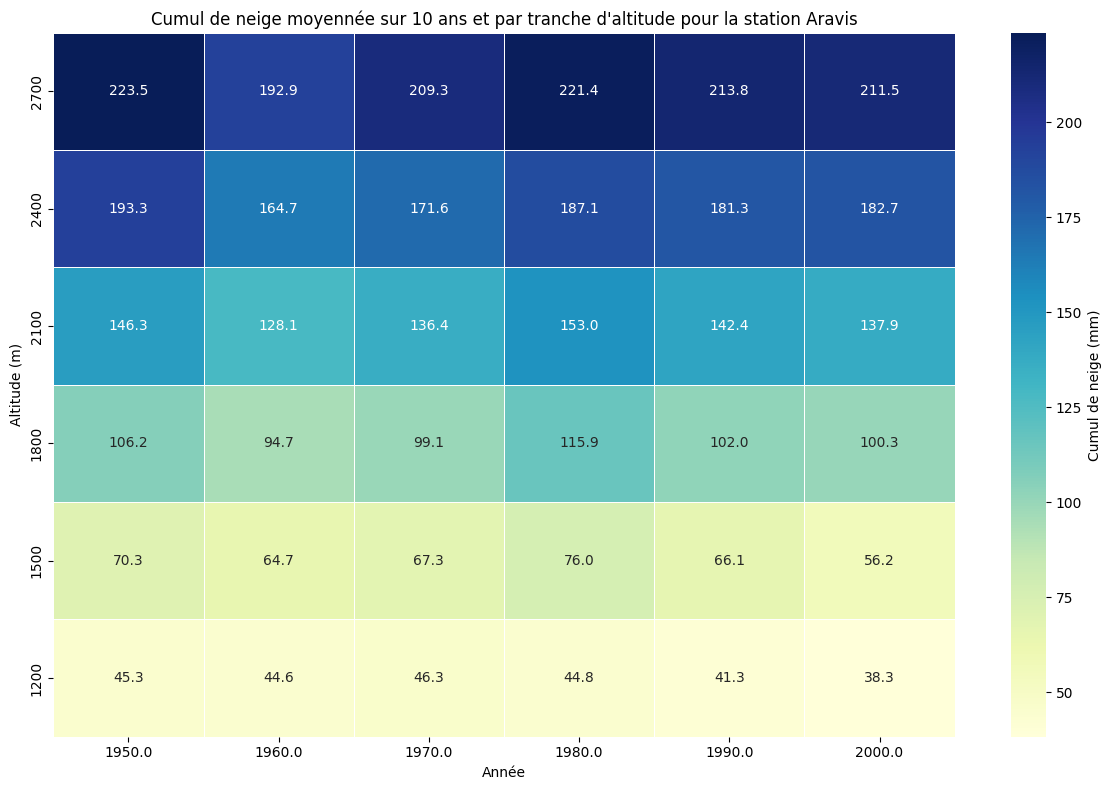

Matrice de l'enneigement pour la station 'Bauges' sauvegardée dans ../export/Matrice_Cumul_Neige_ref/matrice_neige_station_ref_Bauges.svg


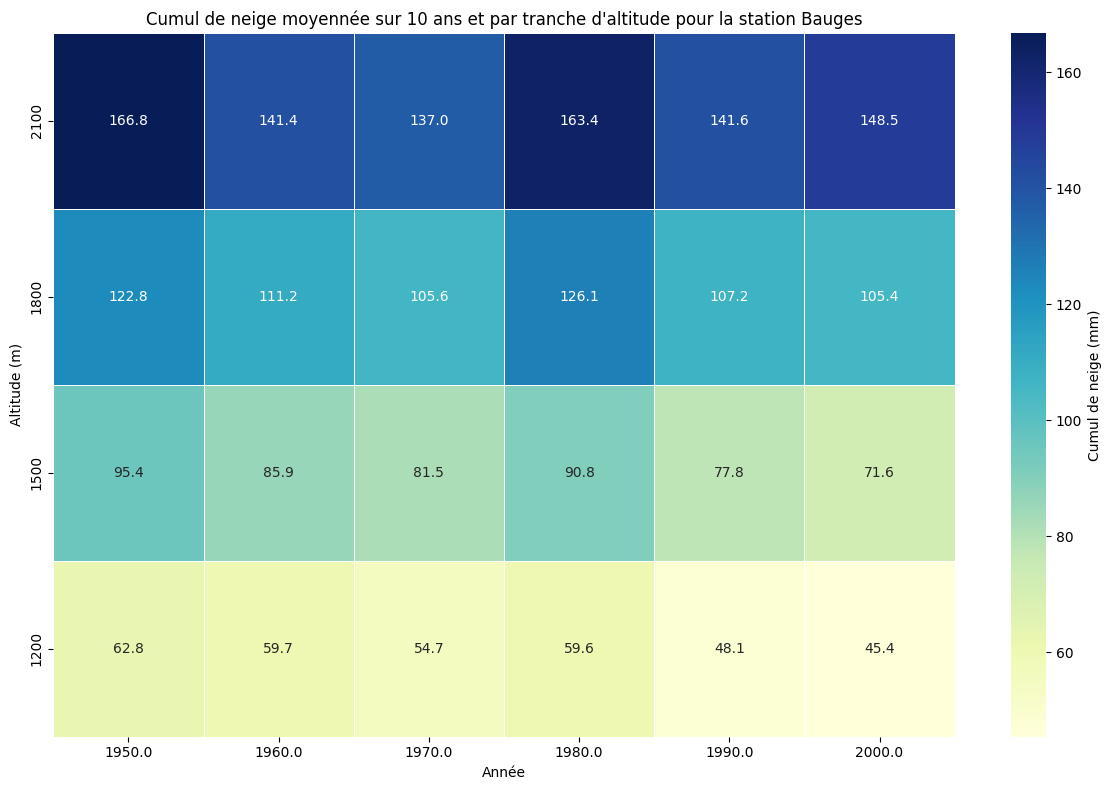

Matrice de l'enneigement pour la station 'Beaufortain' sauvegardée dans ../export/Matrice_Cumul_Neige_ref/matrice_neige_station_ref_Beaufortain.svg


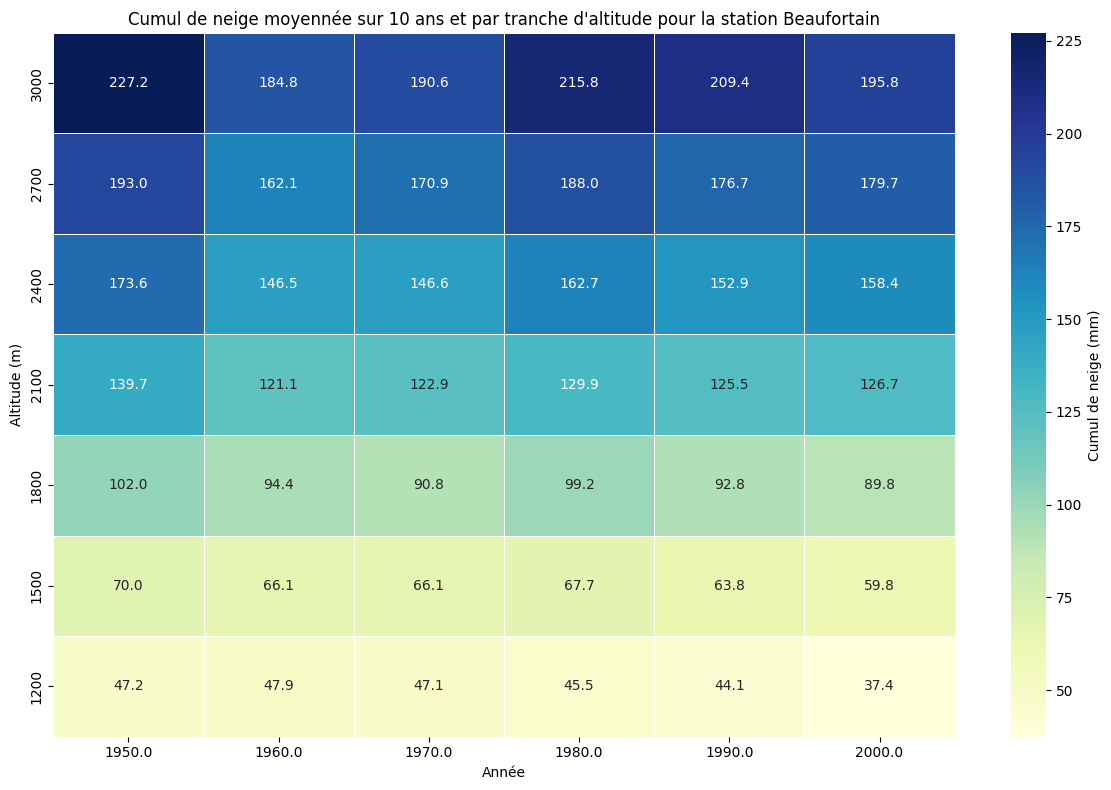

Matrice de l'enneigement pour la station 'Chablais' sauvegardée dans ../export/Matrice_Cumul_Neige_ref/matrice_neige_station_ref_Chablais.svg


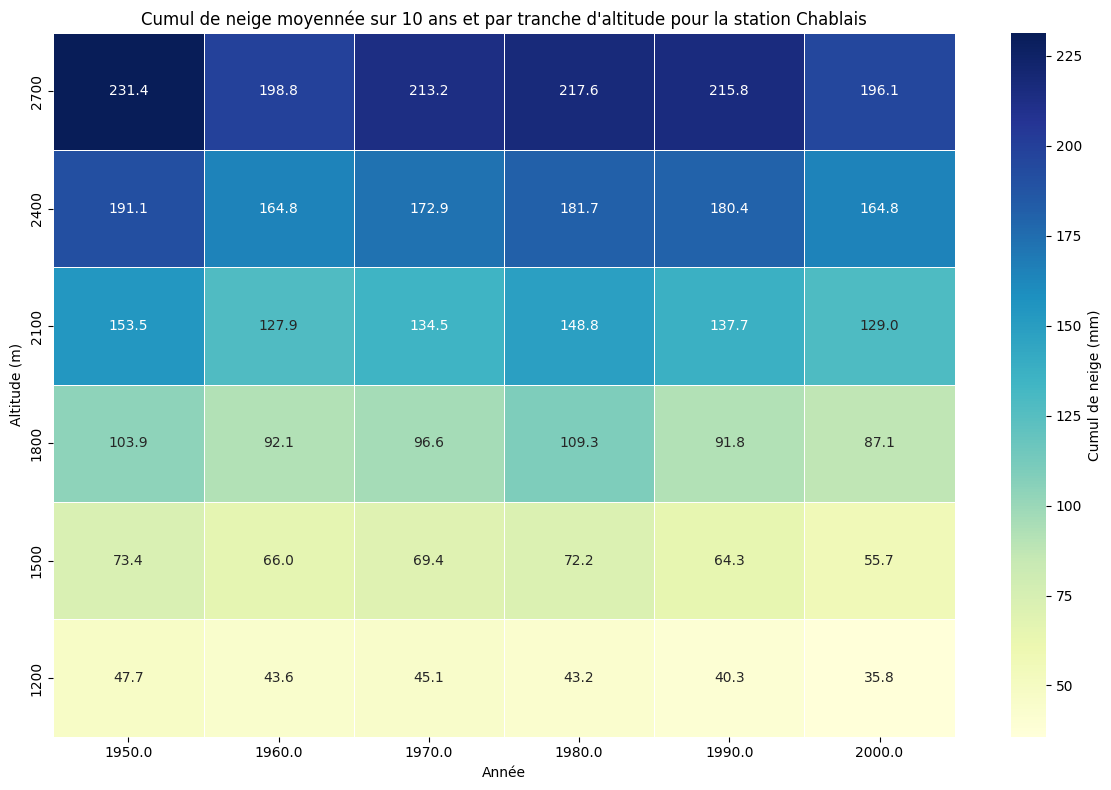

Matrice de l'enneigement pour la station 'Haute-Maurienne' sauvegardée dans ../export/Matrice_Cumul_Neige_ref/matrice_neige_station_ref_Haute_Maurienne.svg


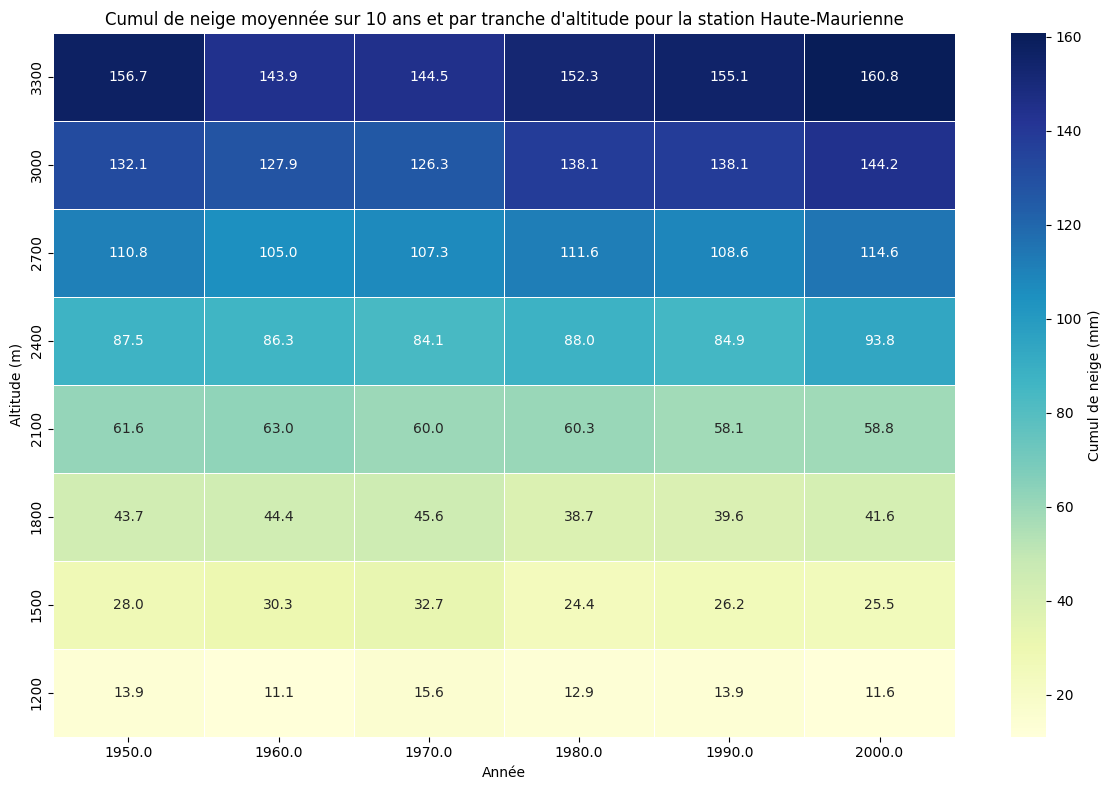

Matrice de l'enneigement pour la station 'Haute-Tarentaise' sauvegardée dans ../export/Matrice_Cumul_Neige_ref/matrice_neige_station_ref_Haute_Tarentaise.svg


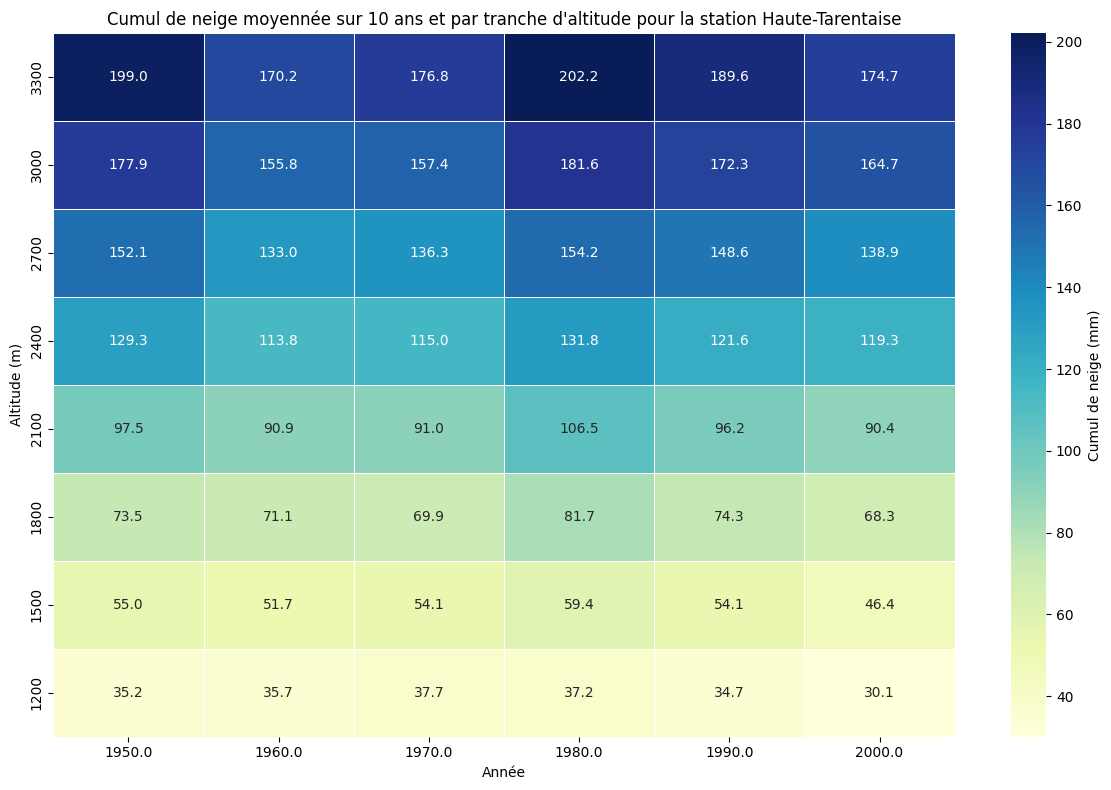

Matrice de l'enneigement pour la station 'Maurienne' sauvegardée dans ../export/Matrice_Cumul_Neige_ref/matrice_neige_station_ref_Maurienne.svg


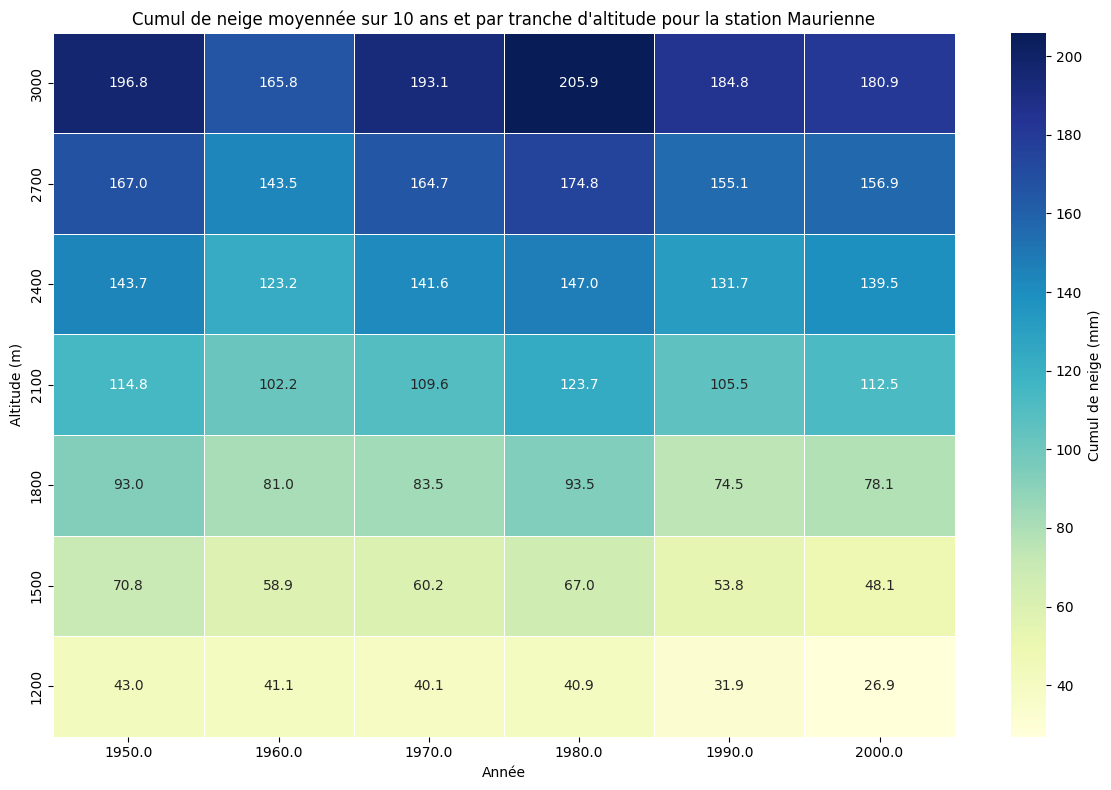

Matrice de l'enneigement pour la station 'Mont-Blanc' sauvegardée dans ../export/Matrice_Cumul_Neige_ref/matrice_neige_station_ref_Mont_Blanc.svg


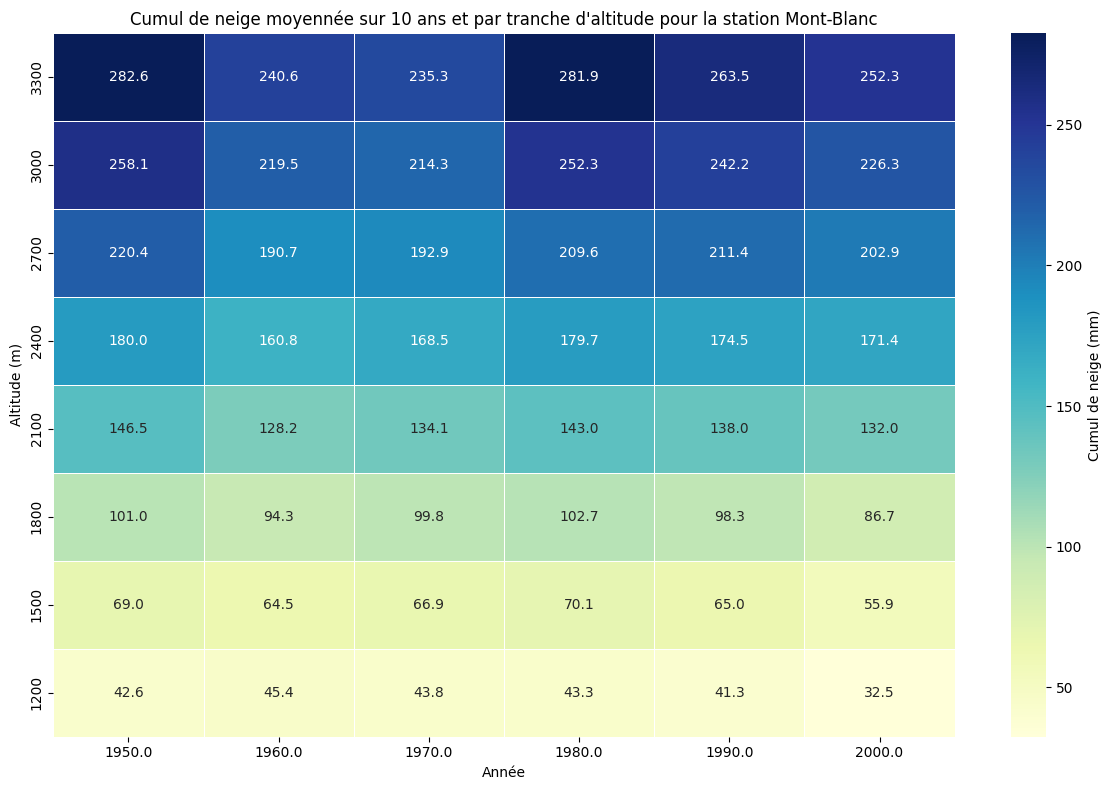

Matrice de l'enneigement pour la station 'Vanoise' sauvegardée dans ../export/Matrice_Cumul_Neige_ref/matrice_neige_station_ref_Vanoise.svg


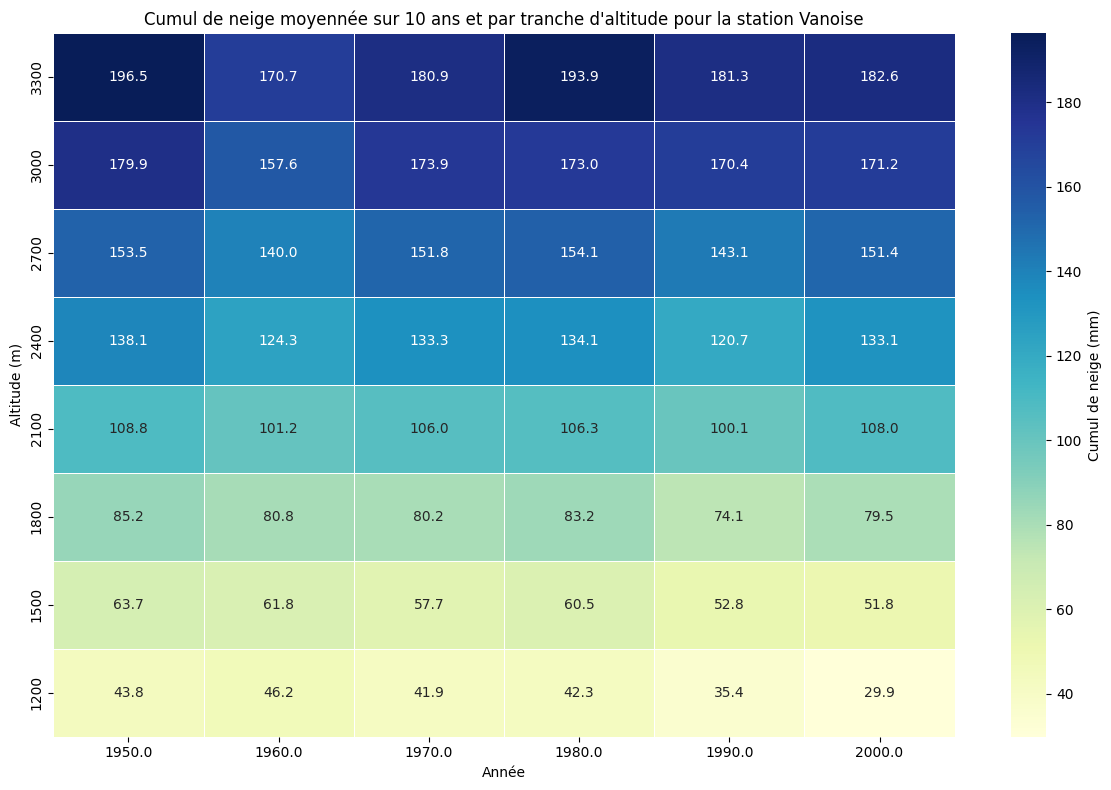

In [12]:
# Liste des stations uniques
stations = df_ref_grouped['Libelle'].unique()

output_dir = "../export/Matrice_Cumul_Neige_ref" 
os.makedirs(output_dir, exist_ok=True)

# Boucle pour traiter chaque station séparément
for station in stations:
    # Filtrer les données pour la station actuelle
    df_ref_grouped_station = df_ref_grouped[df_ref_grouped['Libelle'] == station]

    # Créer une matrice de données où les lignes sont les altitudes, les colonnes sont les années,
    # et les valeurs sont les cumuls de neige
    df_ref_grouped_pivot = df_ref_grouped_station.pivot_table(
        index='Altitude',   # Tranches d'altitude en lignes
        columns='Annee_group',    # Années en colonnes
        values='SNDAV',     # Cumul de neige
        aggfunc='mean',     # Moyenne des cumuls de neige pour chaque combinaison
        fill_value=0        # Remplir les cases vides avec 0 si aucune donnée
    )

    # Trier les altitudes dans l'ordre croissant
    df_ref_grouped_pivot = df_ref_grouped_pivot.sort_index()

    # Inverser l'ordre des altitudes
    df_ref_grouped_pivot = df_ref_grouped_pivot.iloc[::-1]

    # Créer une figure
    plt.figure(figsize=(12, 8))

    # Tracer la heatmap
    sns.heatmap(df_ref_grouped_pivot, cmap='YlGnBu', annot=True, fmt='.1f', linewidths=0.5, 
                cbar_kws={'label': 'Cumul de neige (mm)'})

    # Ajouter des labels et un titre
    plt.xlabel('Année')
    plt.ylabel('Altitude (m)')
    plt.title(f'Cumul de neige moyennée sur 10 ans et par tranche d\'altitude pour la station {station}')

    # Ajuster la mise en page
    plt.tight_layout()

    # Nom de fichier sécurisé pour la station 
    safe_station_name = "".join(c if c.isalnum() else "_" for c in station)
    
    # Chemin complet pour enregistrer le fichier SVG 
    output_path = os.path.join(output_dir, f"matrice_neige_station_ref_{safe_station_name}.svg")
    
    try: 
        # Enregistrer la figure au format SVG avant de l'afficher
        plt.savefig(output_path, format='svg')
        print(f"Matrice de l'enneigement pour la station '{station}' sauvegardée dans {output_path}")
    except Exception as e: 
        print(f"Erreur lors de la sauvegarde de la matrice pour la station '{station}': {e}")
    
    # Afficher le graphique
    plt.show()
    
    # Fermer la figure pour éviter des conflits dans la boucle 
    plt.close()


### Température moyenne par tranche d'altitude 

In [13]:
# Vérifier les types de données et convertir en numérique si nécessaire
df_ref['TAV'] = pd.to_numeric(df_ref['TAV'], errors='coerce')

# Regrouper les données par 'Annee_group', 'Libelle' et 'Altitude'
df_ref_grouped = df_ref_filtered.groupby(['Annee_group', 'Libelle', 'Altitude'])['TAV']\
                                .mean().reset_index()

# Afficher le DataFrame groupé
print(df_ref_grouped)

     Annee_group  Libelle  Altitude       TAV
0         1950.0   Aravis      1200  0.808889
1         1950.0   Aravis      1500 -0.053333
2         1950.0   Aravis      1800 -1.135556
3         1950.0   Aravis      2100 -2.552222
4         1950.0   Aravis      2400 -3.963333
..           ...      ...       ...       ...
367       2000.0  Vanoise      2100 -2.530000
368       2000.0  Vanoise      2400 -3.888333
369       2000.0  Vanoise      2700 -5.465000
370       2000.0  Vanoise      3000 -7.073333
371       2000.0  Vanoise      3300 -8.618333

[372 rows x 4 columns]


Matrice de l'enneigement pour la station 'Aravis' sauvegardée dans ../export/Matrice_Temperature_Ref/matrice_temp_station_ref_Aravis.svg


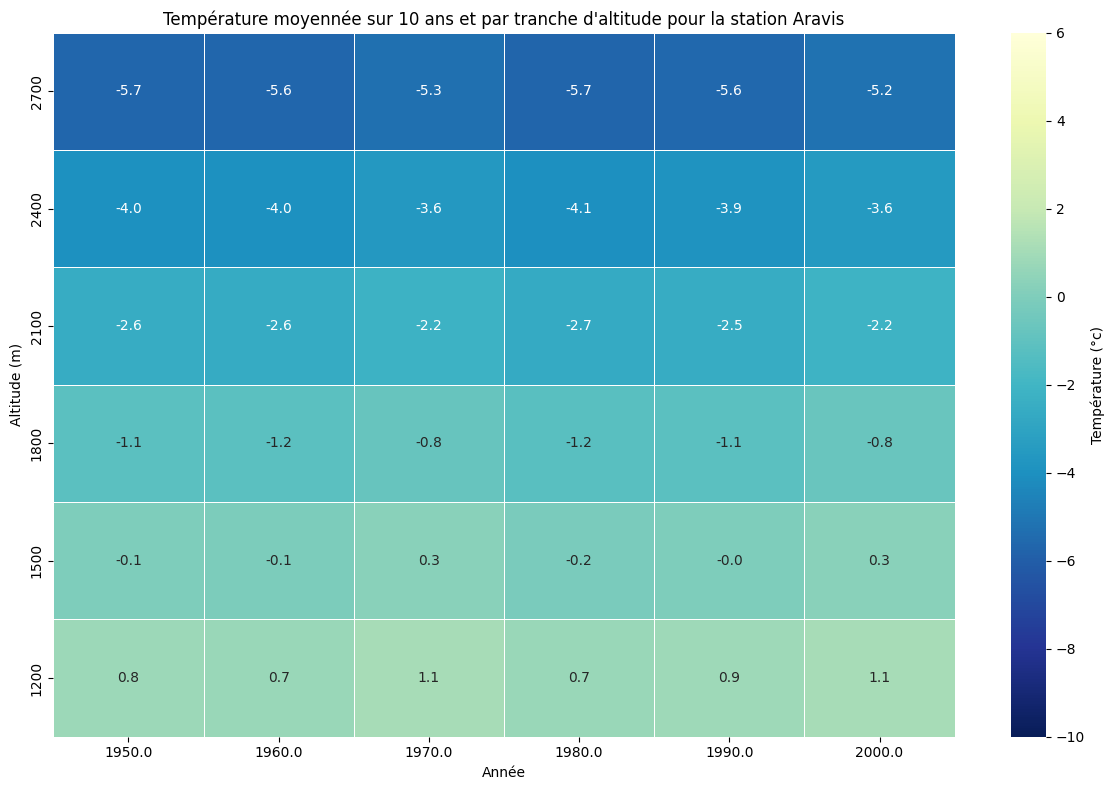

Matrice de l'enneigement pour la station 'Bauges' sauvegardée dans ../export/Matrice_Temperature_Ref/matrice_temp_station_ref_Bauges.svg


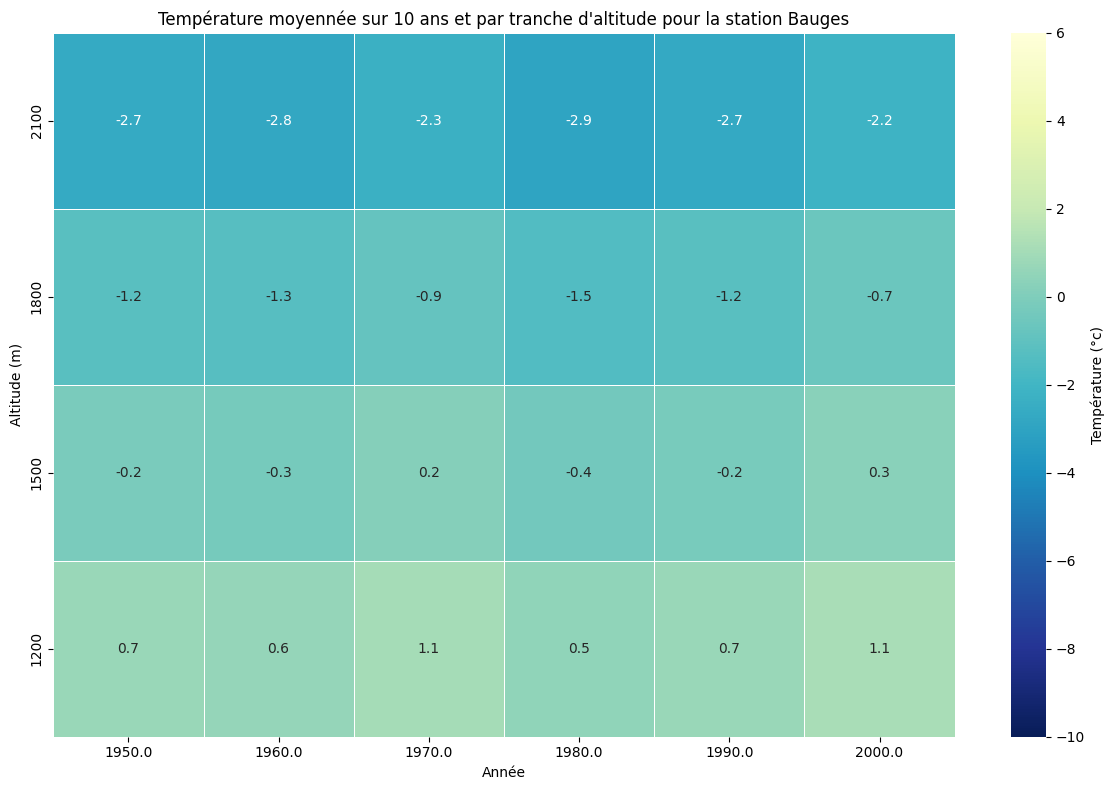

Matrice de l'enneigement pour la station 'Beaufortain' sauvegardée dans ../export/Matrice_Temperature_Ref/matrice_temp_station_ref_Beaufortain.svg


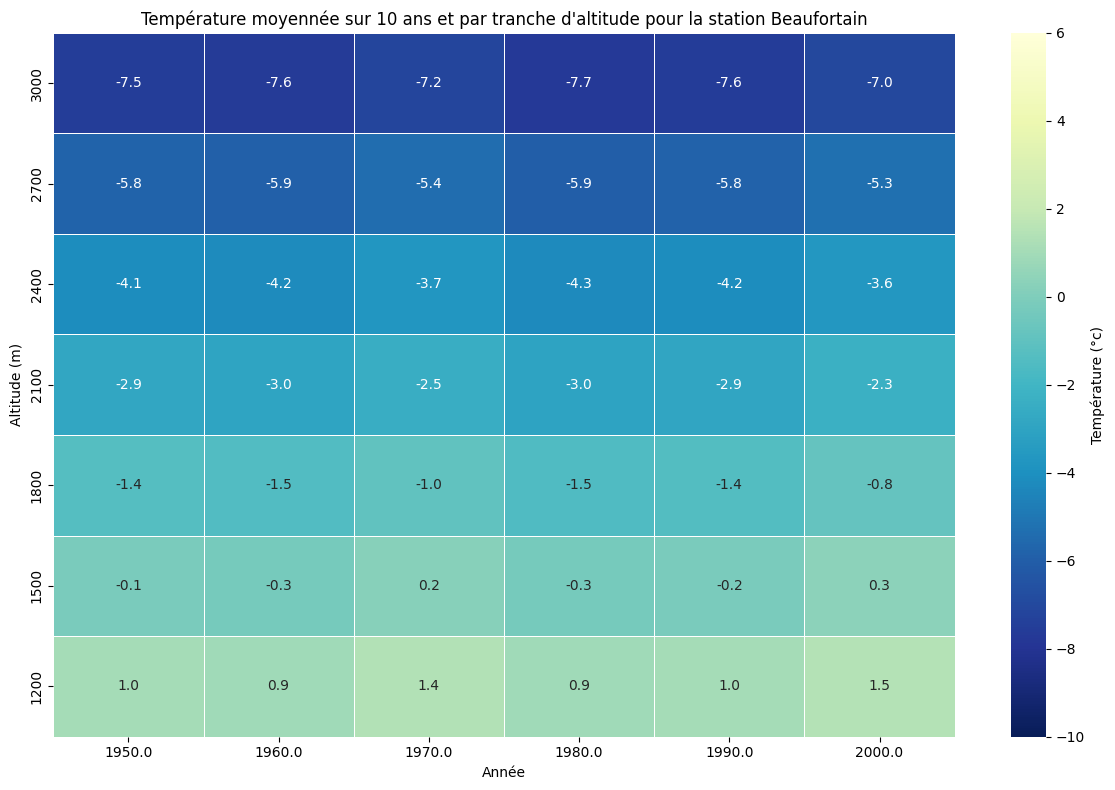

Matrice de l'enneigement pour la station 'Chablais' sauvegardée dans ../export/Matrice_Temperature_Ref/matrice_temp_station_ref_Chablais.svg


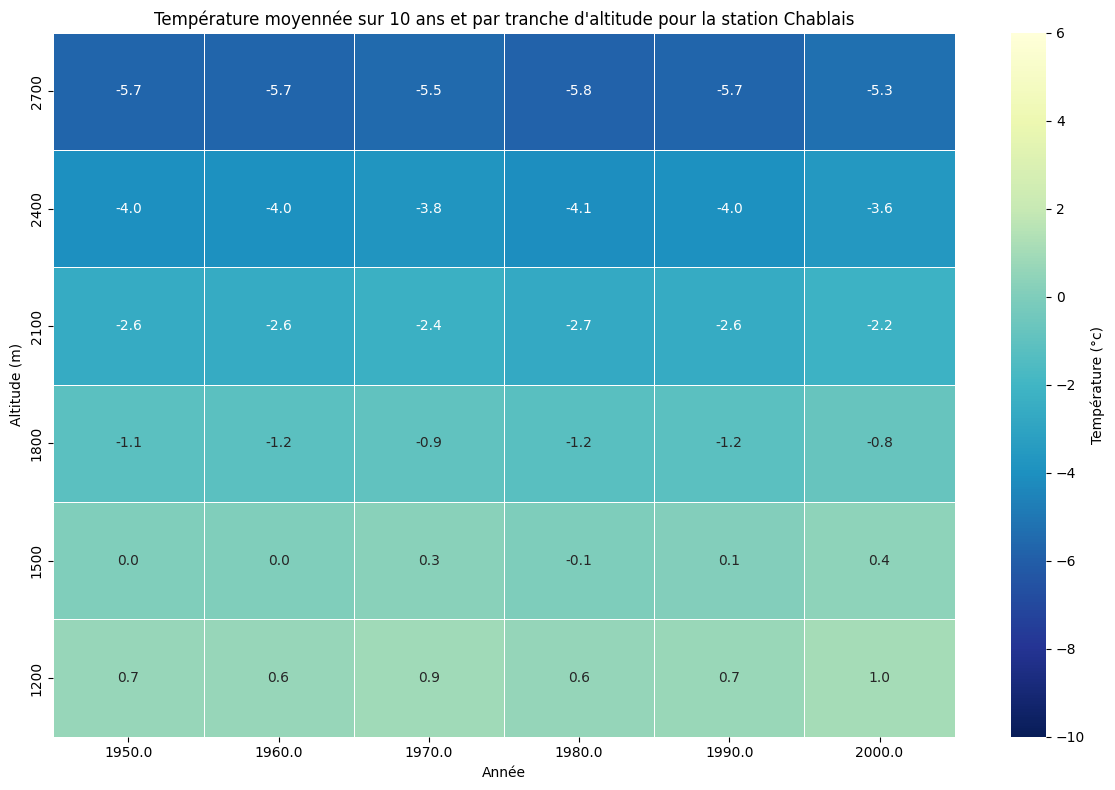

Matrice de l'enneigement pour la station 'Haute-Maurienne' sauvegardée dans ../export/Matrice_Temperature_Ref/matrice_temp_station_ref_Haute_Maurienne.svg


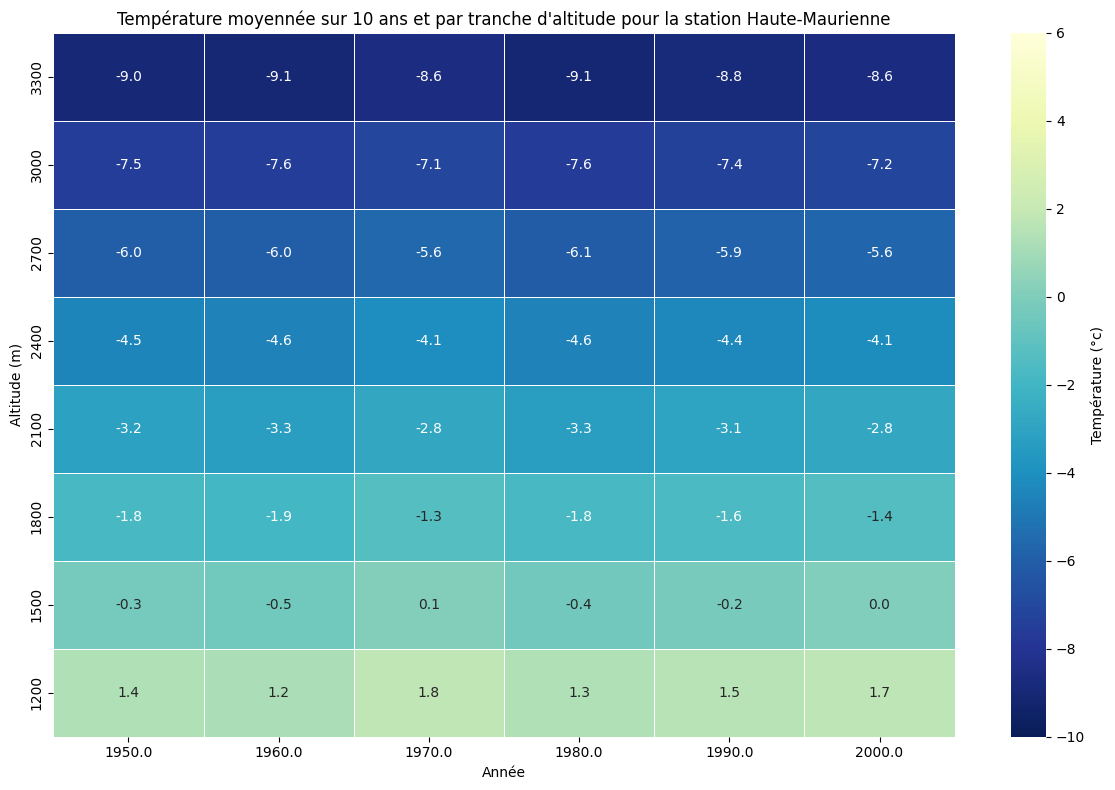

Matrice de l'enneigement pour la station 'Haute-Tarentaise' sauvegardée dans ../export/Matrice_Temperature_Ref/matrice_temp_station_ref_Haute_Tarentaise.svg


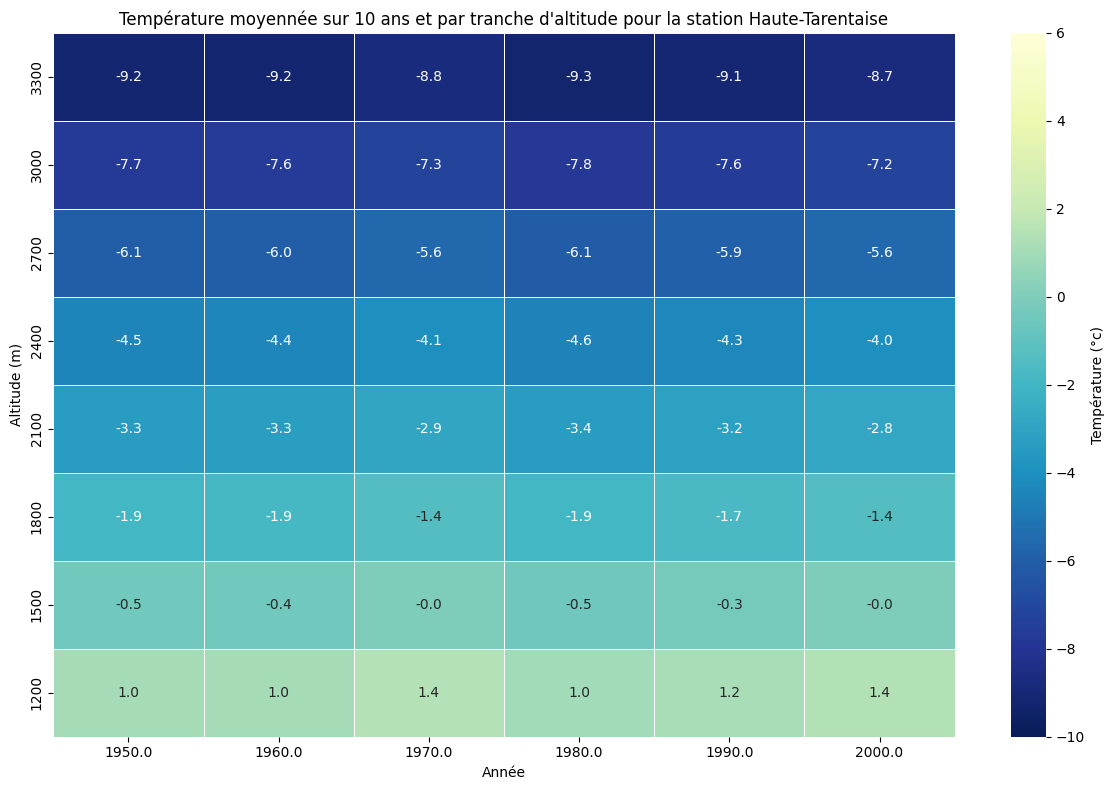

Matrice de l'enneigement pour la station 'Maurienne' sauvegardée dans ../export/Matrice_Temperature_Ref/matrice_temp_station_ref_Maurienne.svg


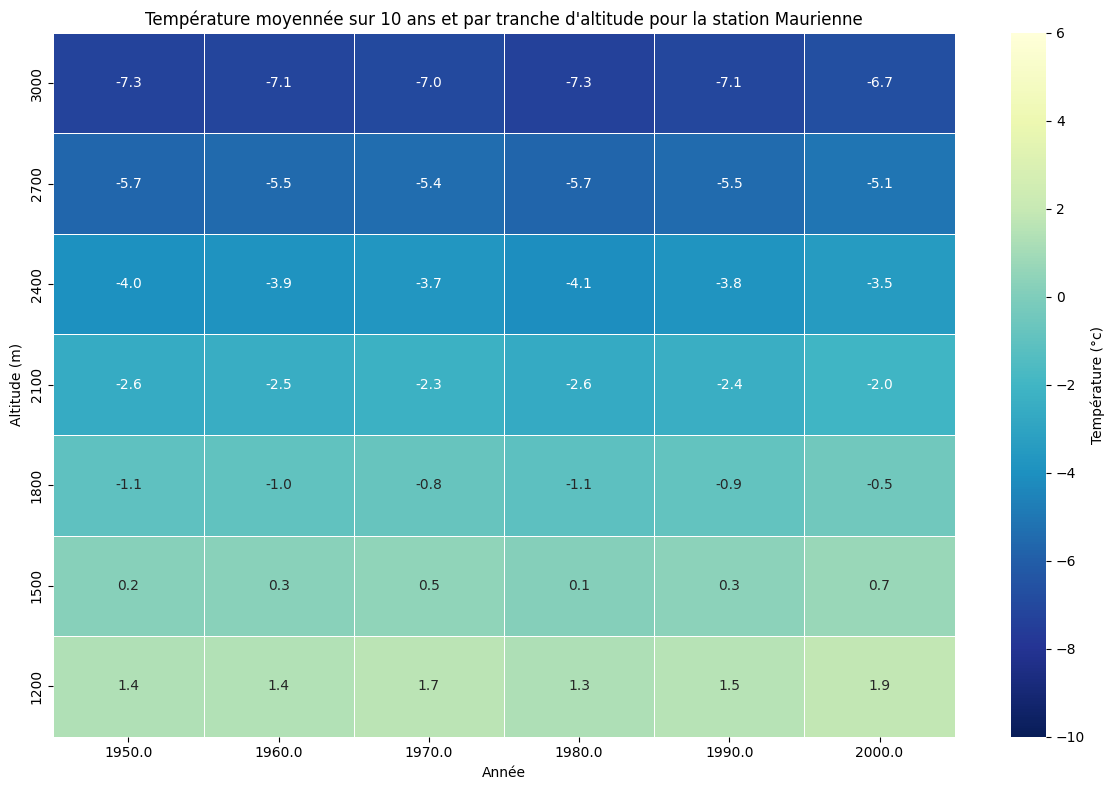

Matrice de l'enneigement pour la station 'Mont-Blanc' sauvegardée dans ../export/Matrice_Temperature_Ref/matrice_temp_station_ref_Mont_Blanc.svg


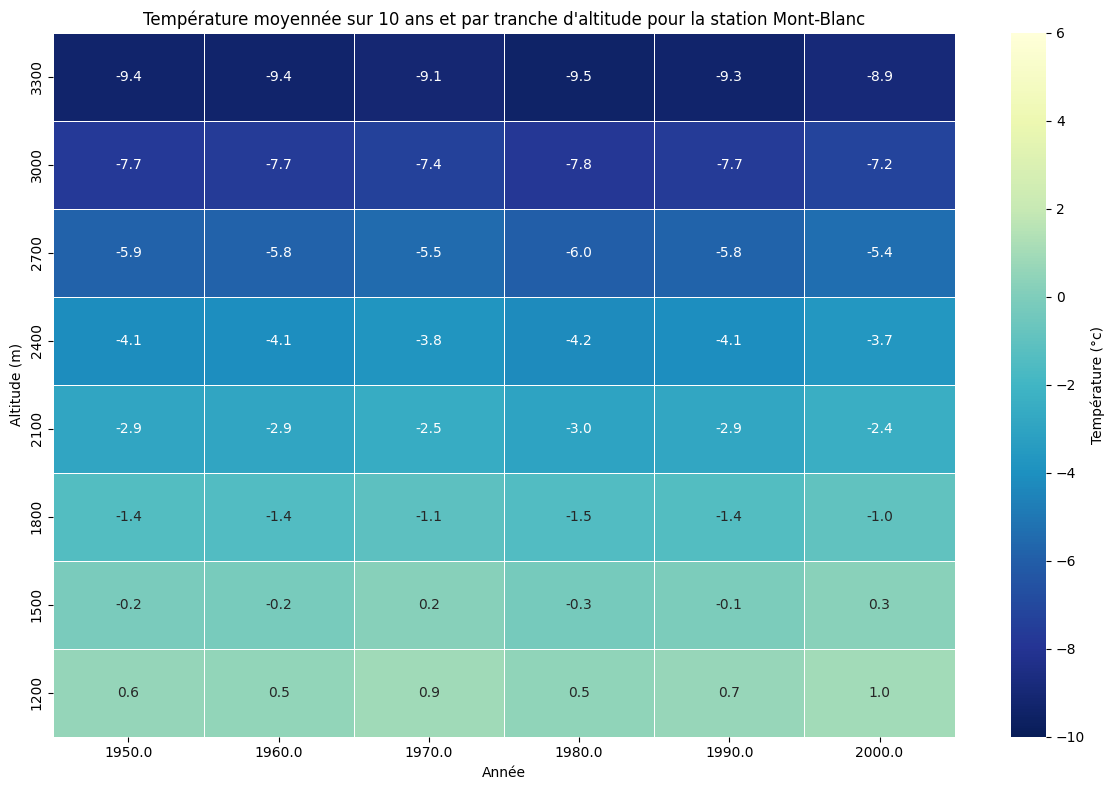

Matrice de l'enneigement pour la station 'Vanoise' sauvegardée dans ../export/Matrice_Temperature_Ref/matrice_temp_station_ref_Vanoise.svg


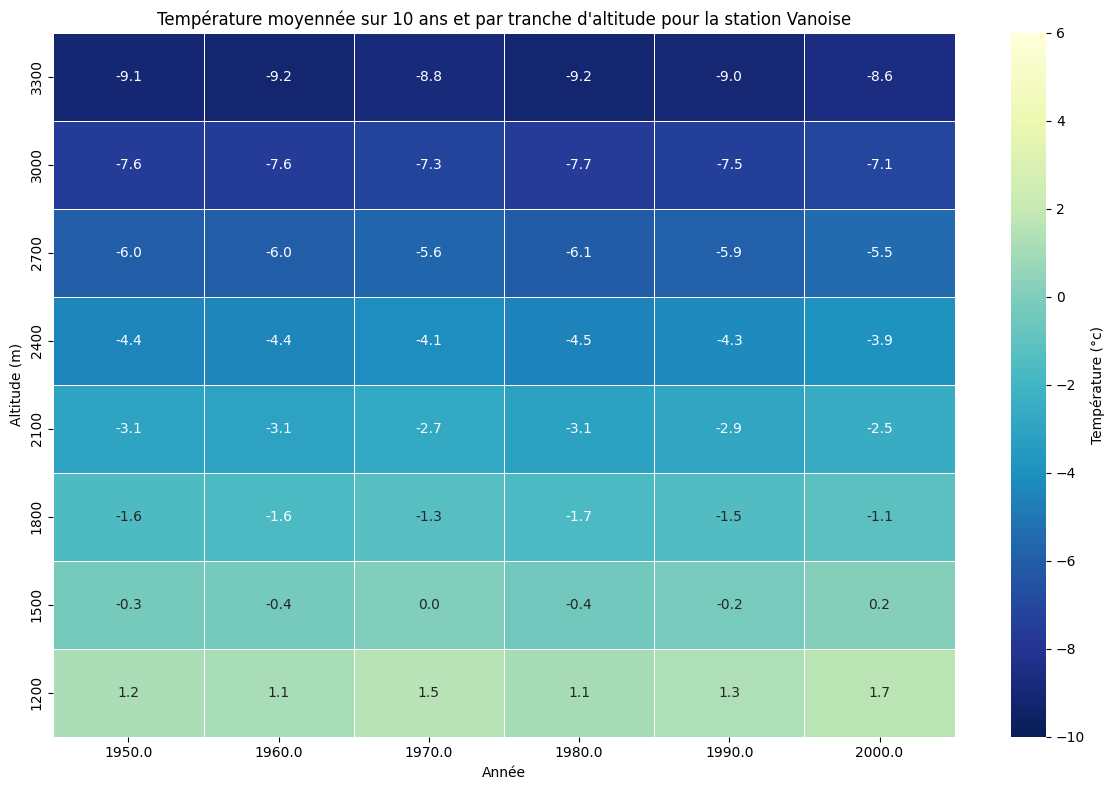

In [14]:
# Liste des stations uniques
stations = df_ref_grouped['Libelle'].unique()

output_dir = "../export/Matrice_Temperature_Ref" 
os.makedirs(output_dir, exist_ok=True)

# Boucle pour traiter chaque station séparément
for station in stations:
    # Filtrer les données pour la station actuelle
    df_ref_grouped_station = df_ref_grouped[df_ref_grouped['Libelle'] == station]

    # Créer une matrice de données où les lignes sont les altitudes, les colonnes sont les années,
    # et les valeurs sont les cumuls de neige
    df_ref_grouped_pivot = df_ref_grouped_station.pivot_table(
        index='Altitude',   # Tranches d'altitude en lignes
        columns='Annee_group',    # Années en colonnes
        values='TAV',       # Cumul de neige
        aggfunc='mean',     # Moyenne des cumuls de neige pour chaque combinaison
        fill_value=0        # Remplir les cases vides avec 0 si aucune donnée
    )

    # Trier les altitudes dans l'ordre croissant
    df_ref_grouped_pivot = df_ref_grouped_pivot.sort_index()

    # Inverser l'ordre des altitudes
    df_ref_grouped_pivot = df_ref_grouped_pivot.iloc[::-1]

    # Créer une figure
    plt.figure(figsize=(12, 8))

    # Tracer la heatmap
    sns.heatmap(
        df_ref_grouped_pivot,
        cmap='YlGnBu_r',      # Palette inversée
        annot=True,
        fmt='.1f',
        linewidths=0.5,
        cbar_kws={'label': 'Température (°c)'},
        vmin=-10,             # Valeur minimale pour la légende
        vmax=6               # Valeur maximale pour la légende
    )


    # Ajouter des labels et un titre
    plt.xlabel('Année')
    plt.ylabel('Altitude (m)')
    plt.title(f'Température moyennée sur 10 ans et par tranche d\'altitude pour la station {station}')

     # Ajuster la mise en page
    plt.tight_layout()

    # Nom de fichier sécurisé pour la station 
    safe_station_name = "".join(c if c.isalnum() else "_" for c in station)
    
    # Chemin complet pour enregistrer le fichier SVG 
    output_path = os.path.join(output_dir, f"matrice_temp_station_ref_{safe_station_name}.svg")
    
    try: 
        # Enregistrer la figure au format SVG avant de l'afficher
        plt.savefig(output_path, format='svg')
        print(f"Matrice de l'enneigement pour la station '{station}' sauvegardée dans {output_path}")
    except Exception as e: 
        print(f"Erreur lors de la sauvegarde de la matrice pour la station '{station}': {e}")
    
    # Afficher le graphique
    plt.show()
    
    # Fermer la figure pour éviter des conflits dans la boucle 
    plt.close()


## Enregistrement du dataframe en json

In [15]:
# Enregistrer le DataFrame en JSON dans un fichier nommé 'data.json'
df_ref.to_json('../export/data_ref.json', orient='records')

-------------------------------------------------------------

-------------------------------------------------------------

# RCP8.5

## Préparations des données

### Chargement des données CSV dans un Dataframe

In [16]:
chemin_fichier = "../input/RCP8_5.csv"
if os.path.exists(chemin_fichier):
    print("Le fichier existe bien :", os.path.abspath(chemin_fichier))
else:
    print("Le fichier est introuvable. Vérifiez le chemin :", os.path.abspath(chemin_fichier))

# Lire le fichier CSV avec des options
df = pd.read_csv(chemin_fichier, sep=';', encoding='utf-8', skip_blank_lines=True, header=49)
df = df.iloc[50:]
df

Le fichier existe bien : /workspaces/R6.01 - Climato SIG/input/RCP8_5.csv


# Identifiant                  Libelle Altitude Contexte   Annee   TAV  \
50         1091500        ALPES : Maurienne   1500 m      REF  2005.0  0.56   
51         1091800        ALPES : Maurienne   1800 m      REF  2005.0 -0.61   
52         1092100        ALPES : Maurienne   2100 m      REF  2005.0 -2.16   
53         1092400        ALPES : Maurienne   2400 m      REF  2005.0 -3.51   
54         1092700        ALPES : Maurienne   2700 m      REF  2005.0 -5.14   
...            ...                      ...      ...      ...     ...   ...   
6908       1113300  ALPES : Haute-Maurienne   3300 m   RCP8.5  2096.0 -3.26   
6909       1113300  ALPES : Haute-Maurienne   3300 m   RCP8.5  2097.0 -4.67   
6910       1113300  ALPES : Haute-Maurienne   3300 m   RCP8.5  2098.0 -4.06   
6911       1113300  ALPES : Haute-Maurienne   3300 m   RCP8.5  2099.0 -3.10   
6912       1113300  ALPES : Haute-Maurienne   3300 m   RCP8.5  2100.0 -4.94   

      TNAV  TXAV   SD  TXND  ...  PXCDD   PINT  RRSN   SNDAV   SND5  SND50  \
50   -2.93  4.05  0.0  23.0  ...   28.0  11.34  0.56   44.93  144.0  104.0   
51   -3.90  2.68  0.0  17.0  ...   28.0  10.58  0.69   72.25  149.0  121.0   
52   -5.30  0.97  0.0  17.0  ...   28.0  11.30  0.89   88.88  170.0  135.0   
53   -6.63 -0.40  0.0  15.0  ...   28.0  11.99  0.96  112.52  180.0  147.0   
54   -8.11 -2.17  0.0  14.0  ...   28.0  12.53  0.98  128.85  181.0  149.0   
...    ...   ...  ...   ...  ...    ...    ...   ...     ...    ...    ...   
6908 -5.29 -1.24  0.0  93.0  ...   12.0   9.92  1.00   78.66  171.0  130.0   
6909 -6.89 -2.45  0.0  65.0  ...   27.0   7.88  1.00  100.60  181.0  162.0   
6910 -6.35 -1.77  0.0  86.0  ...   16.0   8.68  1.00   77.26  168.0  146.0   
6911 -5.27 -0.93  0.0  93.0  ...   14.0   9.07  0.99   98.73  181.0  136.0   
6912 -7.15 -2.73  0.0  62.0  ...   26.0  10.97  1.00  116.29  166.0  147.0   

      SND100     SWE      SWEDAT  Unnamed: 37  
50       0.0  296.13  20050322.0          NaN  
51      35.0  433.10  20050404.0          NaN  
52     103.0  506.76  20050422.0          NaN  
53     125.0  681.60  20050424.0          NaN  
54     130.0  749.17  20050424.0          NaN  
...      ...     ...         ...          ...  
6908    64.0  387.64  20960410.0          NaN  
6909    82.0  601.85  20970428.0          NaN  
6910    69.0  404.39  20980412.0          NaN  
6911   112.0  544.76  20990416.0          NaN  
6912    95.0  584.52  21000404.0          NaN  

[6863 rows x 38 columns]

### Regrouper les années par intervalles de 10 ans

In [17]:
# Si la colonne 'Annee' est de type datetime, nous devons extraire l'année sous forme d'entier
if pd.api.types.is_datetime64_any_dtype(df['Annee']):
    df['Annee'] = df['Annee'].dt.year

# Suppression du préfixe "Alpes : "
df['Libelle'] = df['Libelle'].str.replace(r"^ALPES : ", "", regex=True)
# Affichage du dataframe modifié
print(df)

# Filtrer les données où la colonne 'Altitude > 1200m
df_filtered = df[df['Altitude'] >= '1200 m']

# Créer une nouvelle colonne 'Annee_group' pour regrouper les années par intervalles de 10 ans
df_filtered['Annee_group'] = (df_filtered['Annee'] // 10) * 10

df_filtered

     # Identifiant          Libelle Altitude Contexte   Annee   TAV  TNAV  \
50         1091500        Maurienne   1500 m      REF  2005.0  0.56 -2.93   
51         1091800        Maurienne   1800 m      REF  2005.0 -0.61 -3.90   
52         1092100        Maurienne   2100 m      REF  2005.0 -2.16 -5.30   
53         1092400        Maurienne   2400 m      REF  2005.0 -3.51 -6.63   
54         1092700        Maurienne   2700 m      REF  2005.0 -5.14 -8.11   
...            ...              ...      ...      ...     ...   ...   ...   
6908       1113300  Haute-Maurienne   3300 m   RCP8.5  2096.0 -3.26 -5.29   
6909       1113300  Haute-Maurienne   3300 m   RCP8.5  2097.0 -4.67 -6.89   
6910       1113300  Haute-Maurienne   3300 m   RCP8.5  2098.0 -4.06 -6.35   
6911       1113300  Haute-Maurienne   3300 m   RCP8.5  2099.0 -3.10 -5.27   
6912       1113300  Haute-Maurienne   3300 m   RCP8.5  2100.0 -4.94 -7.15   

      TXAV   SD  TXND  ...  PXCDD   PINT  RRSN   SNDAV   SND5  SND50  SND10

# Identifiant          Libelle Altitude Contexte   Annee   TAV  TNAV  \
50         1091500        Maurienne   1500 m      REF  2005.0  0.56 -2.93   
51         1091800        Maurienne   1800 m      REF  2005.0 -0.61 -3.90   
52         1092100        Maurienne   2100 m      REF  2005.0 -2.16 -5.30   
53         1092400        Maurienne   2400 m      REF  2005.0 -3.51 -6.63   
54         1092700        Maurienne   2700 m      REF  2005.0 -5.14 -8.11   
...            ...              ...      ...      ...     ...   ...   ...   
6908       1113300  Haute-Maurienne   3300 m   RCP8.5  2096.0 -3.26 -5.29   
6909       1113300  Haute-Maurienne   3300 m   RCP8.5  2097.0 -4.67 -6.89   
6910       1113300  Haute-Maurienne   3300 m   RCP8.5  2098.0 -4.06 -6.35   
6911       1113300  Haute-Maurienne   3300 m   RCP8.5  2099.0 -3.10 -5.27   
6912       1113300  Haute-Maurienne   3300 m   RCP8.5  2100.0 -4.94 -7.15   

      TXAV   SD  TXND  ...   PINT  RRSN   SNDAV   SND5  SND50  SND100     SWE  \
50    4.05  0.0  23.0  ...  11.34  0.56   44.93  144.0  104.0     0.0  296.13   
51    2.68  0.0  17.0  ...  10.58  0.69   72.25  149.0  121.0    35.0  433.10   
52    0.97  0.0  17.0  ...  11.30  0.89   88.88  170.0  135.0   103.0  506.76   
53   -0.40  0.0  15.0  ...  11.99  0.96  112.52  180.0  147.0   125.0  681.60   
54   -2.17  0.0  14.0  ...  12.53  0.98  128.85  181.0  149.0   130.0  749.17   
...    ...  ...   ...  ...    ...   ...     ...    ...    ...     ...     ...   
6908 -1.24  0.0  93.0  ...   9.92  1.00   78.66  171.0  130.0    64.0  387.64   
6909 -2.45  0.0  65.0  ...   7.88  1.00  100.60  181.0  162.0    82.0  601.85   
6910 -1.77  0.0  86.0  ...   8.68  1.00   77.26  168.0  146.0    69.0  404.39   
6911 -0.93  0.0  93.0  ...   9.07  0.99   98.73  181.0  136.0   112.0  544.76   
6912 -2.73  0.0  62.0  ...  10.97  1.00  116.29  166.0  147.0    95.0  584.52   

          SWEDAT  Unnamed: 37  Annee_group  
50    20050322.0          NaN       2000.0  
51    20050404.0          NaN       2000.0  
52    20050422.0          NaN       2000.0  
53    20050424.0          NaN       2000.0  
54    20050424.0          NaN       2000.0  
...          ...          ...          ...  
6908  20960410.0          NaN       2090.0  
6909  20970428.0          NaN       2090.0  
6910  20980412.0          NaN       2090.0  
6911  20990416.0          NaN       2090.0  
6912  21000404.0          NaN       2100.0  

[6863 rows x 39 columns]

## Epaiseeur de neige

### Regrouper des données par groupe d'année et calcule de la moyenne

In [18]:
# Regrouper les données par la colonne 'Annee_group' et 'Libelle' et calculer la moyenne de 'SNDAV'
df_grouped = df_filtered.groupby(['Annee_group', 'Libelle'])['SNDAV'].mean().reset_index()
df_grouped

Annee_group           Libelle       SNDAV
0        2000.0            Aravis  106.440714
1        2000.0            Bauges   66.284583
2        2000.0       Beaufortain  118.893750
3        2000.0          Chablais   93.406250
4        2000.0   Haute-Maurienne   72.736250
..          ...               ...         ...
94       2100.0   Haute-Maurienne   51.200000
95       2100.0  Haute-Tarentaise   61.714444
96       2100.0         Maurienne   43.005556
97       2100.0        Mont-Blanc   91.377500
98       2100.0           Vanoise   60.075556

[99 rows x 3 columns]

### Graphique

Graphique sauvegardée dans ../export/Graphique_RCP/epaisseur_moyen_RCP.png


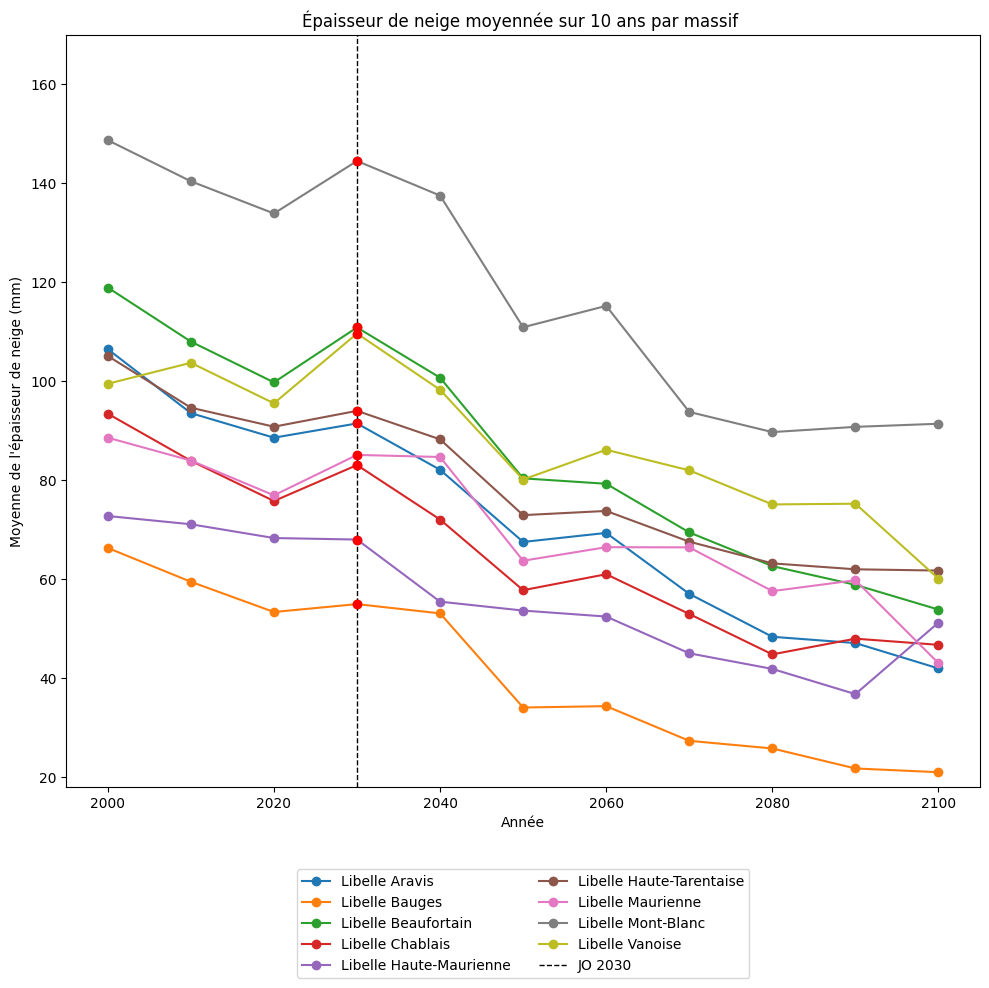

In [19]:
# Tracer le graphique
plt.figure(figsize=(10, 10))

# Tracer les courbes pour chaque libellé
for libelle in df_grouped['Libelle'].unique():
    libelle_data = df_grouped[df_grouped['Libelle'] == libelle]
    plt.plot(libelle_data['Annee_group'], libelle_data['SNDAV'], label=f'Libelle {libelle}', marker='o')

    # Ajouter un marker à l'année 2030
    data_2030 = libelle_data[libelle_data['Annee_group'] == 2030]
    if not data_2030.empty:  # Vérifier si des données existent pour 2030
        plt.scatter(data_2030['Annee_group'], data_2030['SNDAV'], color='red', label=None, zorder=5)

# Ajouter une ligne verticale en pointillée pour l'année 2030
plt.axvline(x=2030, color='black', linestyle='--', linewidth=1, label="JO 2030")

# Ajouter des labels et un titre
plt.xlabel('Année')
plt.ylabel('Moyenne de l\'épaisseur de neige (mm)')
plt.title('Épaisseur de neige moyennée sur 10 ans par massif ')

# Ajouter une légende
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

# Paramétrage des ordonnées pour qu'il corresponde aux valeurs du graph de référence
plt.ylim(18, 170)


# Ajuster la mise en page
plt.tight_layout()

# Définir le chemin de sauvegarde (non caché)
output_dir = "../export/Graphique_RCP"
os.makedirs(output_dir, exist_ok=True)  # Crée le dossier et ses parents si nécessaire

# Chemin complet pour enregistrer le fichier png
output_path = os.path.join(output_dir, "epaisseur_moyen_RCP.png")

try:
    # Enregistrer la figure au format png
    plt.savefig(output_path, format='png', dpi=300, bbox_inches="tight")
    print(f"Graphique sauvegardée dans {output_path}")
except Exception as e:
    print(f"Erreur lors de la sauvegarde du graphique: {e}")

# Afficher le graphique
plt.show()

## Temperature moyenne

### Regrouper des données par groupe d'année et calcule de la moyenne

In [20]:
# Regrouper les données par la colonne 'Annee_group' et 'Libelle' et calculer la moyenne de 'SNDAV'
df_grouped = df_filtered.groupby(['Annee_group', 'Libelle'])['TAV'].mean().reset_index()
df_grouped

Annee_group           Libelle       TAV
0        2000.0            Aravis -1.726429
1        2000.0            Bauges  0.154167
2        2000.0       Beaufortain -2.422813
3        2000.0          Chablais -1.067500
4        2000.0   Haute-Maurienne -3.887500
..          ...               ...       ...
94       2100.0   Haute-Maurienne  0.221250
95       2100.0  Haute-Tarentaise  1.004444
96       2100.0         Maurienne  2.571111
97       2100.0        Mont-Blanc  0.527500
98       2100.0           Vanoise  1.441111

[99 rows x 3 columns]

### Graphique

Graphique sauvegardée dans ../export/Graphique_RCP/temperature_moyenne_RCP.png


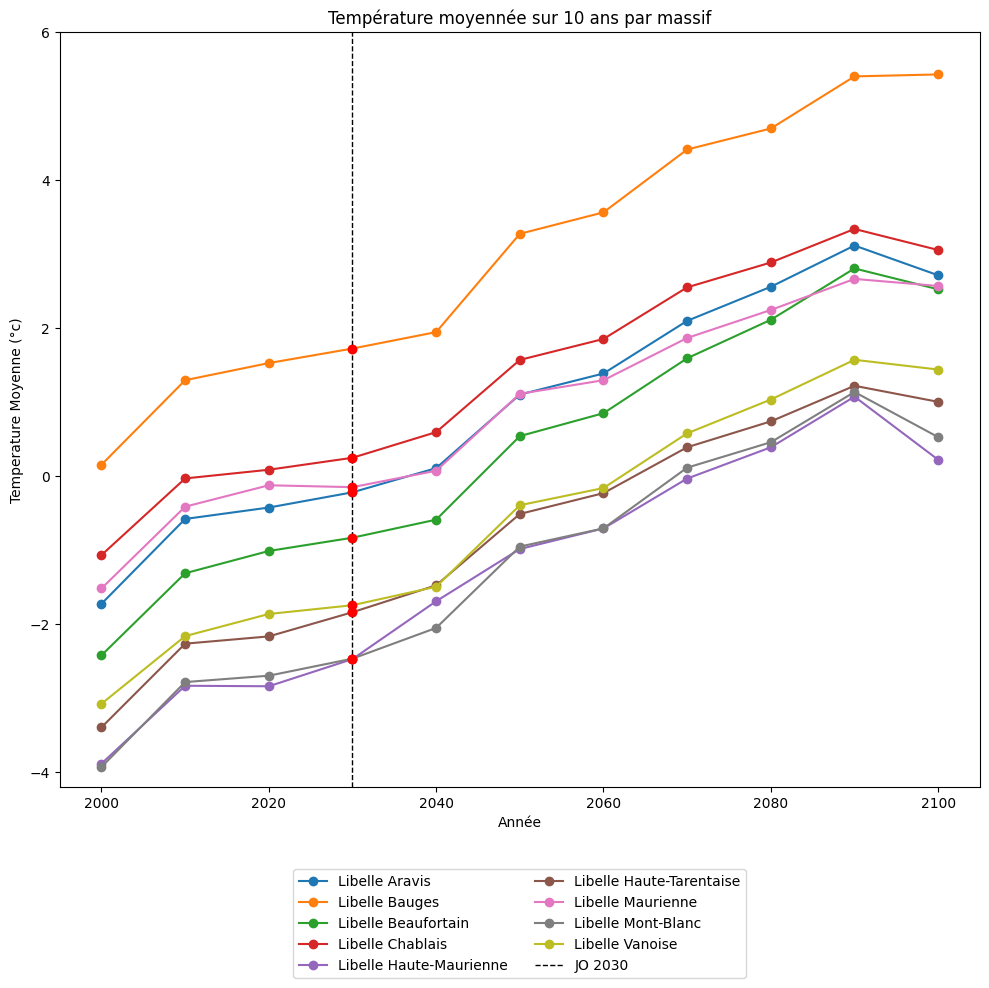

In [21]:
# Tracer le graphique
plt.figure(figsize=(10, 10))

# Tracer les courbes pour chaque libellé
for libelle in df_grouped['Libelle'].unique():
    libelle_data = df_grouped[df_grouped['Libelle'] == libelle]
    plt.plot(libelle_data['Annee_group'], libelle_data['TAV'], label=f'Libelle {libelle}', marker='o')

    # Ajouter un marker à l'année 2030
    data_2030 = libelle_data[libelle_data['Annee_group'] == 2030]
    if not data_2030.empty:  # Vérifier si des données existent pour 2030
        plt.scatter(data_2030['Annee_group'], data_2030['TAV'], color='red', label=None, zorder=5)

# Ajouter une ligne verticale en pointillée pour l'année 2030
plt.axvline(x=2030, color='black', linestyle='--', linewidth=1, label="JO 2030")

# Ajouter des labels et un titre
plt.xlabel('Année')
plt.ylabel('Temperature Moyenne (°c)')
plt.title('Température moyennée sur 10 ans par massif')

# Ajouter une légende
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

# Paramétrage des ordonnées pour qu'il corresponde aux valeurs du graph de référence
plt.ylim(-4.2, 6)

# Afficher le graphique
plt.tight_layout()

# Définir le chemin de sauvegarde (non caché)
output_dir = "../export/Graphique_RCP"
os.makedirs(output_dir, exist_ok=True)  # Crée le dossier et ses parents si nécessaire

# Chemin complet pour enregistrer le fichier png
output_path = os.path.join(output_dir, "temperature_moyenne_RCP.png")

try:
    # Enregistrer la figure au format png
    plt.savefig(output_path, format='png', dpi=300, bbox_inches="tight")
    print(f"Graphique sauvegardée dans {output_path}")
except Exception as e:
    print(f"Erreur lors de la sauvegarde du graphique: {e}")

# Afficher le graphique
plt.show()

## Nombre de jour moyen de givre

### Regrouper des données par groupe d'année et calcule de la moyenne

In [22]:
# Regrouper les données par la colonne 'Annee_group' et 'Libelle' et calculer la moyenne de 'SNDAV'
df_grouped = df_filtered.groupby(['Annee_group', 'Libelle'])['TNFD'].mean().reset_index()
df_grouped

Annee_group           Libelle        TNFD
0        2000.0            Aravis  147.535714
1        2000.0            Bauges  131.375000
2        2000.0       Beaufortain  149.968750
3        2000.0          Chablais  140.250000
4        2000.0   Haute-Maurienne  165.150000
..          ...               ...         ...
94       2100.0   Haute-Maurienne  132.625000
95       2100.0  Haute-Tarentaise  124.333333
96       2100.0         Maurienne   99.888889
97       2100.0        Mont-Blanc  116.500000
98       2100.0           Vanoise  111.777778

[99 rows x 3 columns]

### Graphique

Graphique sauvegardée dans ../export/Graphique_RCP/nombre_moyen_givre_RCP.png


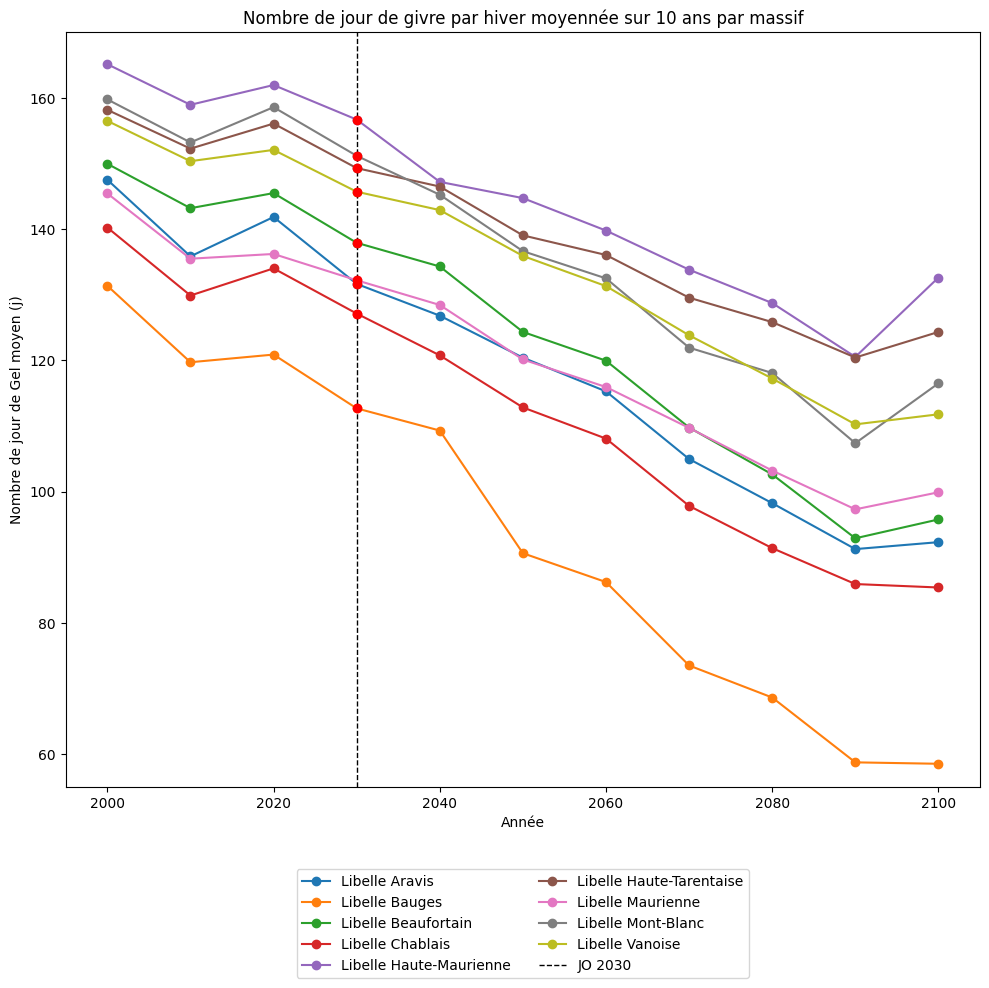

In [23]:
# Tracer le graphique
plt.figure(figsize=(10, 10))

# Tracer les courbes pour chaque libellé
for libelle in df_grouped['Libelle'].unique():
    libelle_data = df_grouped[df_grouped['Libelle'] == libelle]
    plt.plot(libelle_data['Annee_group'], libelle_data['TNFD'], label=f'Libelle {libelle}', marker='o')

    # Ajouter un marker à l'année 2030
    data_2030 = libelle_data[libelle_data['Annee_group'] == 2030]
    if not data_2030.empty:  # Vérifier si des données existent pour 2030
        plt.scatter(data_2030['Annee_group'], data_2030['TNFD'], color='red', label=None, zorder=5)

# Ajouter une ligne verticale en pointillée pour l'année 2030
plt.axvline(x=2030, color='black', linestyle='--', linewidth=1, label="JO 2030")

# Ajouter des labels et un titre
plt.xlabel('Année')
plt.ylabel('Nombre de jour de Gel moyen (j)')
plt.title('Nombre de jour de givre par hiver moyennée sur 10 ans par massif')

# Ajouter une légende
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

# Paramétrage des ordonnées pour qu'il corresponde aux valeurs du graph de référence
plt.ylim(55, 170)

# Afficher le graphique
plt.tight_layout()

# Définir le chemin de sauvegarde (non caché)
output_dir = "../export/Graphique_RCP"
os.makedirs(output_dir, exist_ok=True)  # Crée le dossier et ses parents si nécessaire

# Chemin complet pour enregistrer le fichier png
output_path = os.path.join(output_dir, "nombre_moyen_givre_RCP.png")

try:
    # Enregistrer la figure au format png
    plt.savefig(output_path, format='png', dpi=300, bbox_inches="tight")
    print(f"Graphique sauvegardée dans {output_path}")
except Exception as e:
    print(f"Erreur lors de la sauvegarde du graphique: {e}")

# Afficher le graphique
plt.show()

## Matrice

### Cumul de neige par année et tranche d'altitude

In [24]:
# Vérifier les types de données et convertir si nécessaire
df['Annee'] = pd.to_numeric(df['Annee'], errors='coerce')  # Convertir en numérique si nécessaire
df['SNDAV'] = pd.to_numeric(df['SNDAV'], errors='coerce')

# Nettoyer la colonne 'Altitude' : supprimer le " m" et convertir en entier
df['Altitude'] = df['Altitude'].str.replace(' m', '').astype(int)

# Filtrer les données pour n'inclure que celles avec une altitude >= 1200 m
df_filtered = df[df['Altitude'] >= 1200]

# Créer une nouvelle colonne 'Annee_group' pour regrouper les années par intervalles de 10 ans
df_filtered['Annee_group'] = (df_filtered['Annee'] // 10) * 10

# Regrouper les données par 'Annee_group', 'Libelle' et 'Altitude'
df_grouped = df_filtered.groupby(['Annee_group', 'Libelle', 'Altitude'])['SNDAV']\
                                .mean().reset_index()

# Afficher le DataFrame groupé
print(df_grouped)

     Annee_group  Libelle  Altitude     SNDAV
0         2000.0   Aravis      1200   43.3475
1         2000.0   Aravis      1500   65.4025
2         2000.0   Aravis      1800   96.6525
3         2000.0   Aravis      2100  132.8850
4         2000.0   Aravis      2400  168.3225
..           ...      ...       ...       ...
677       2100.0  Vanoise      2100   50.3600
678       2100.0  Vanoise      2400   76.9000
679       2100.0  Vanoise      2700   95.2600
680       2100.0  Vanoise      3000  120.2600
681       2100.0  Vanoise      3300  132.6400

[682 rows x 4 columns]


/tmp/ipykernel_21163/4129749997.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Annee_group'] = (df_filtered['Annee'] // 10) * 10


Matrice de l'enneigement pour la station 'Aravis' sauvegardée dans ../export/Matrice_Cumul_Neige_RCP/matrice_neige_station_RCP_Aravis.svg


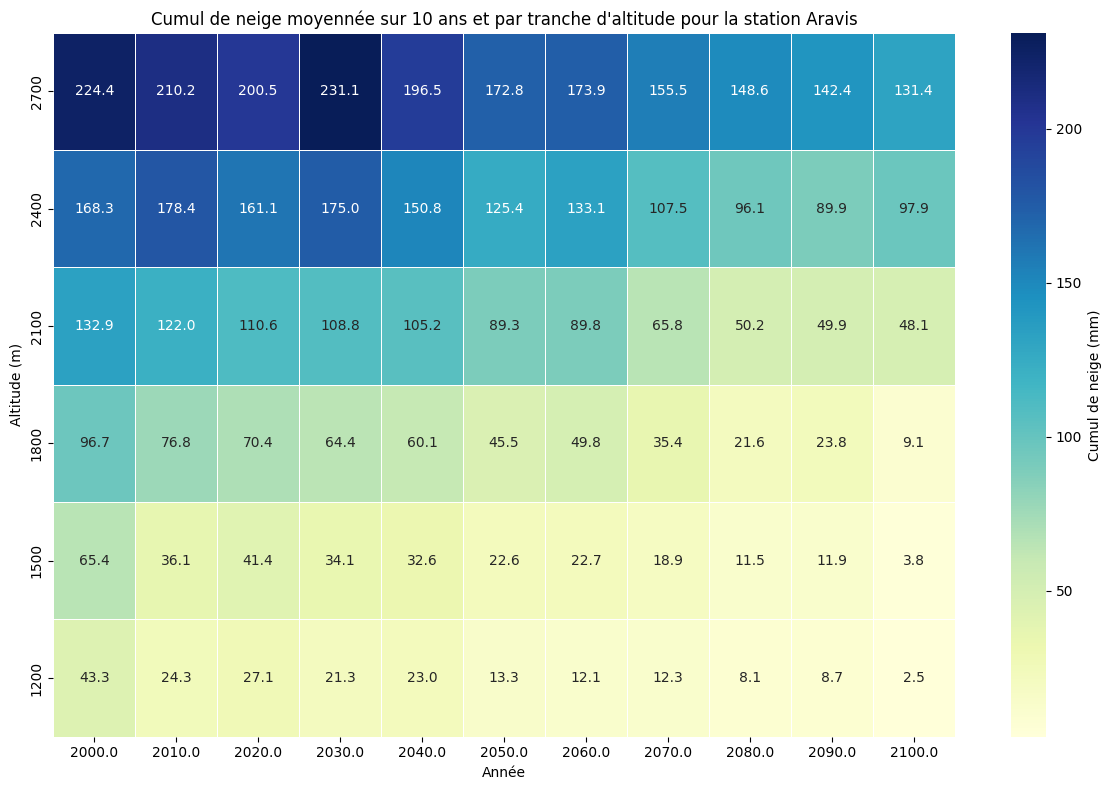

Matrice de l'enneigement pour la station 'Bauges' sauvegardée dans ../export/Matrice_Cumul_Neige_RCP/matrice_neige_station_RCP_Bauges.svg


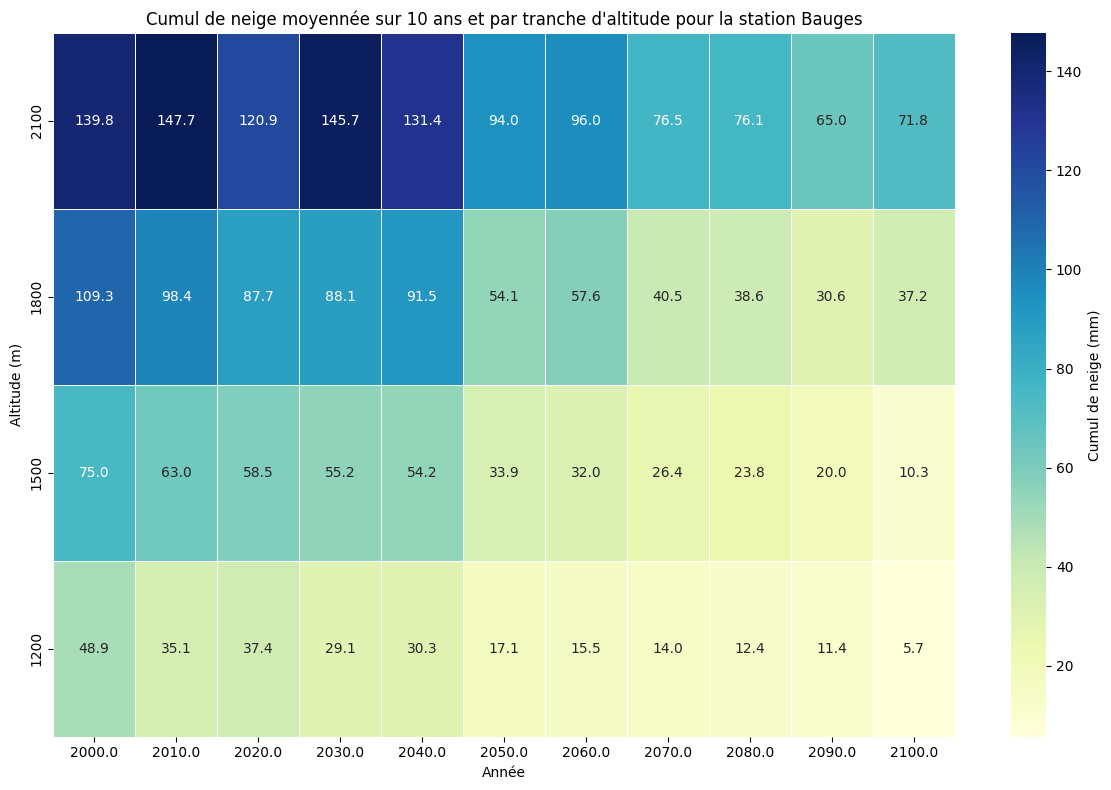

Matrice de l'enneigement pour la station 'Beaufortain' sauvegardée dans ../export/Matrice_Cumul_Neige_RCP/matrice_neige_station_RCP_Beaufortain.svg


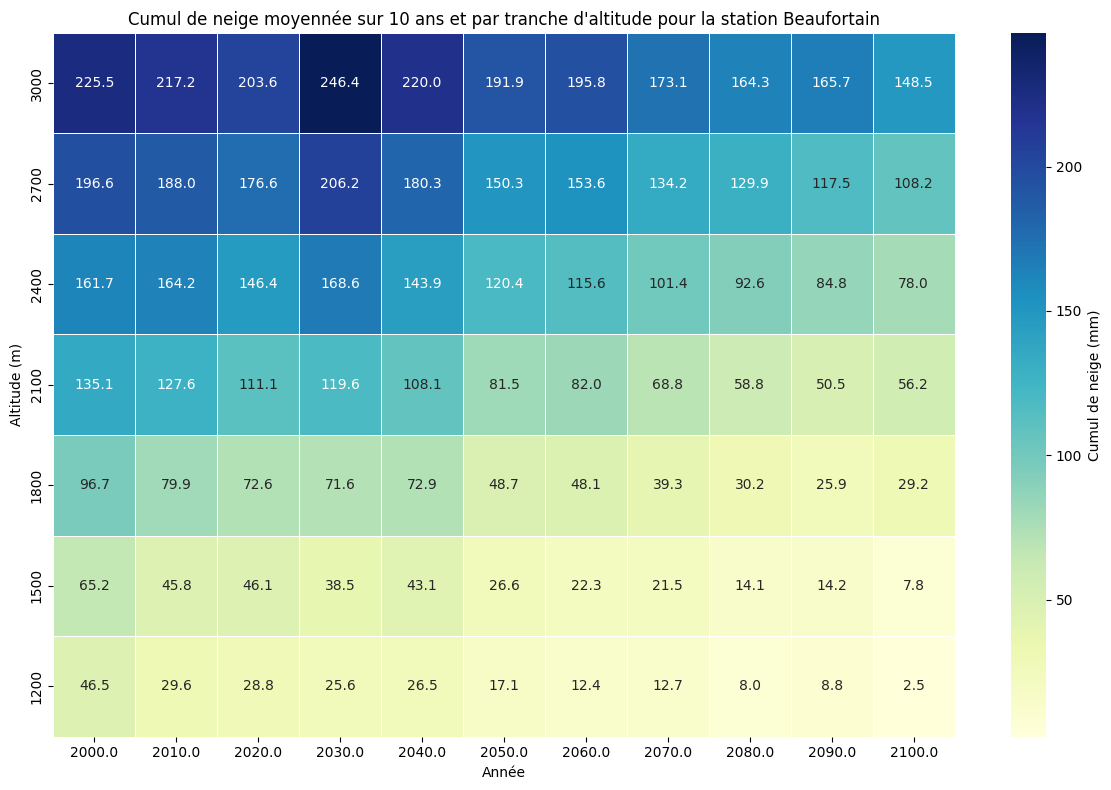

Matrice de l'enneigement pour la station 'Chablais' sauvegardée dans ../export/Matrice_Cumul_Neige_RCP/matrice_neige_station_RCP_Chablais.svg


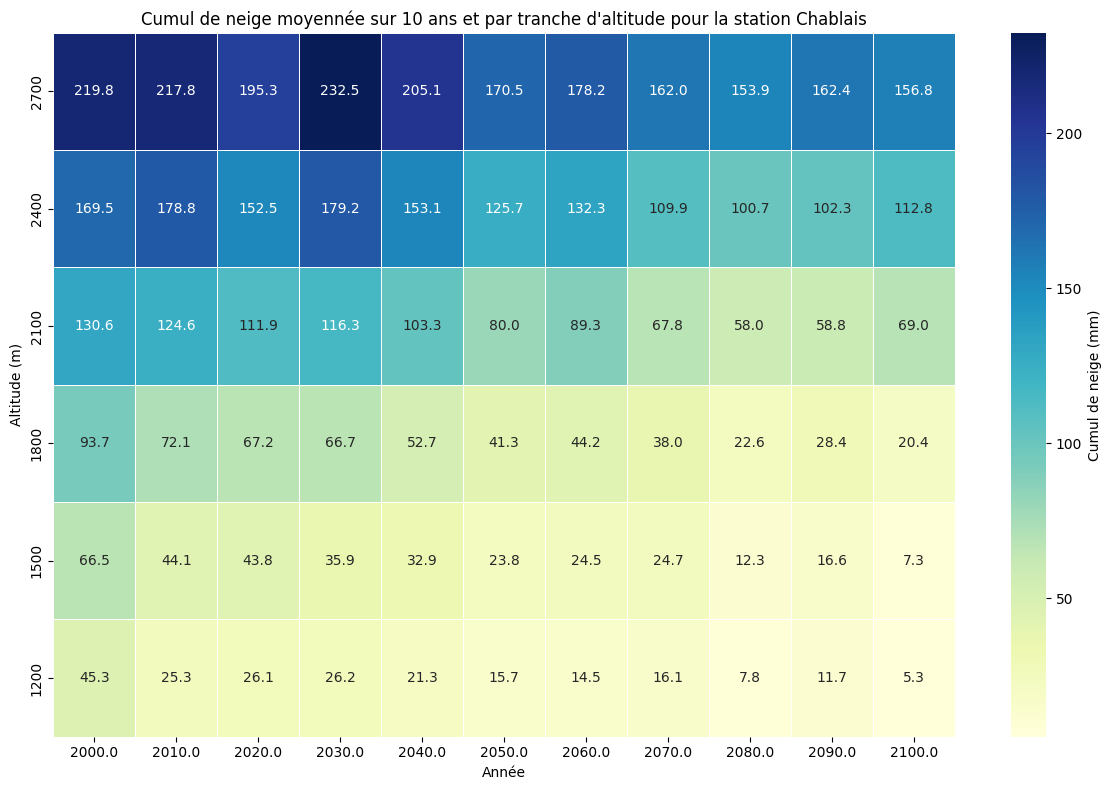

Matrice de l'enneigement pour la station 'Haute-Maurienne' sauvegardée dans ../export/Matrice_Cumul_Neige_RCP/matrice_neige_station_RCP_Haute_Maurienne.svg


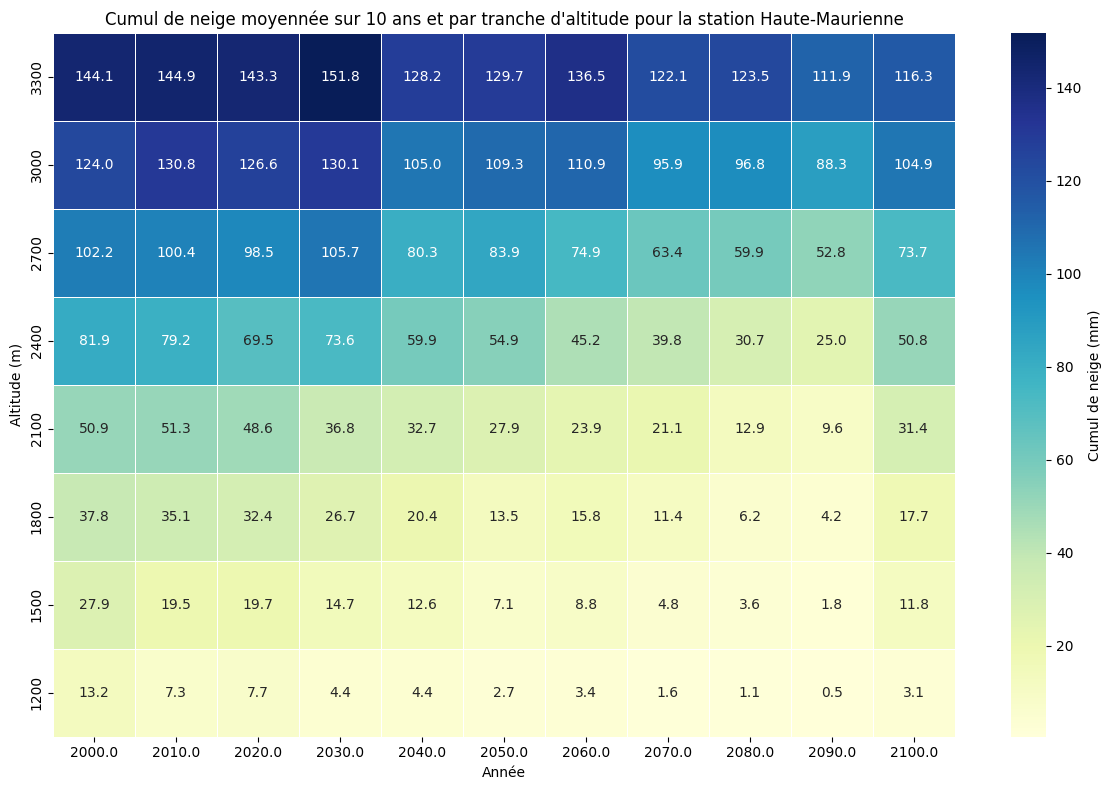

Matrice de l'enneigement pour la station 'Haute-Tarentaise' sauvegardée dans ../export/Matrice_Cumul_Neige_RCP/matrice_neige_station_RCP_Haute_Tarentaise.svg


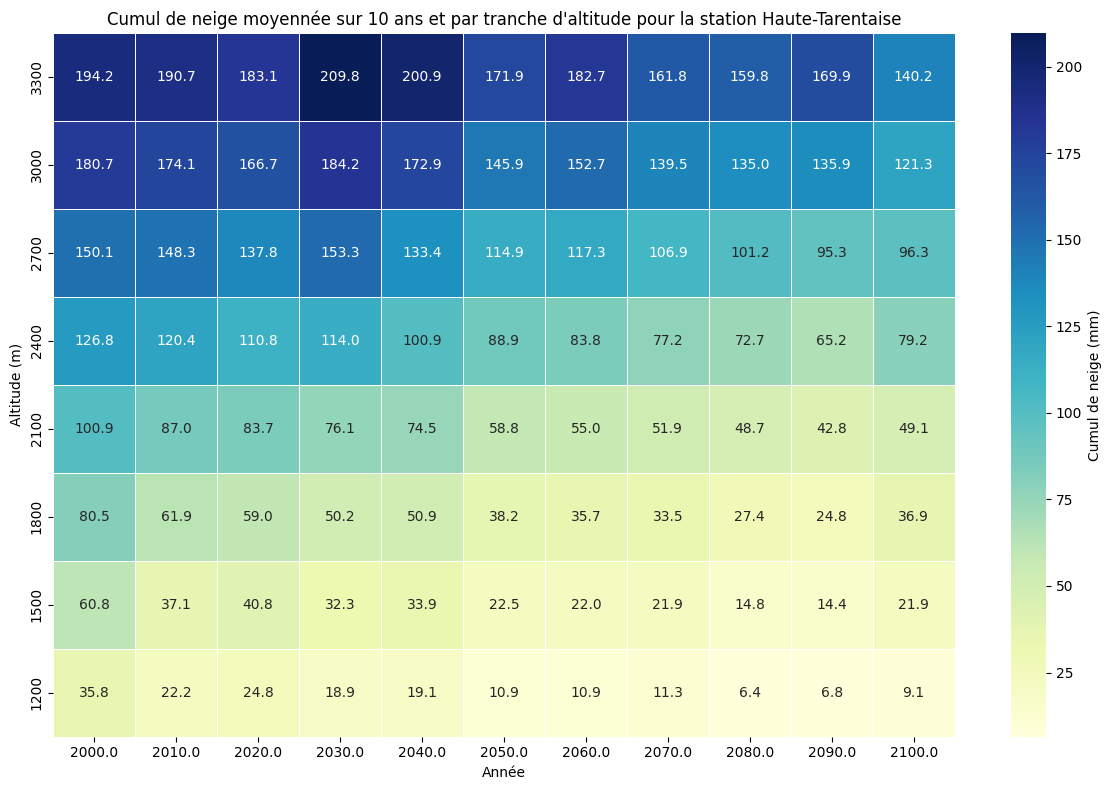

Matrice de l'enneigement pour la station 'Maurienne' sauvegardée dans ../export/Matrice_Cumul_Neige_RCP/matrice_neige_station_RCP_Maurienne.svg


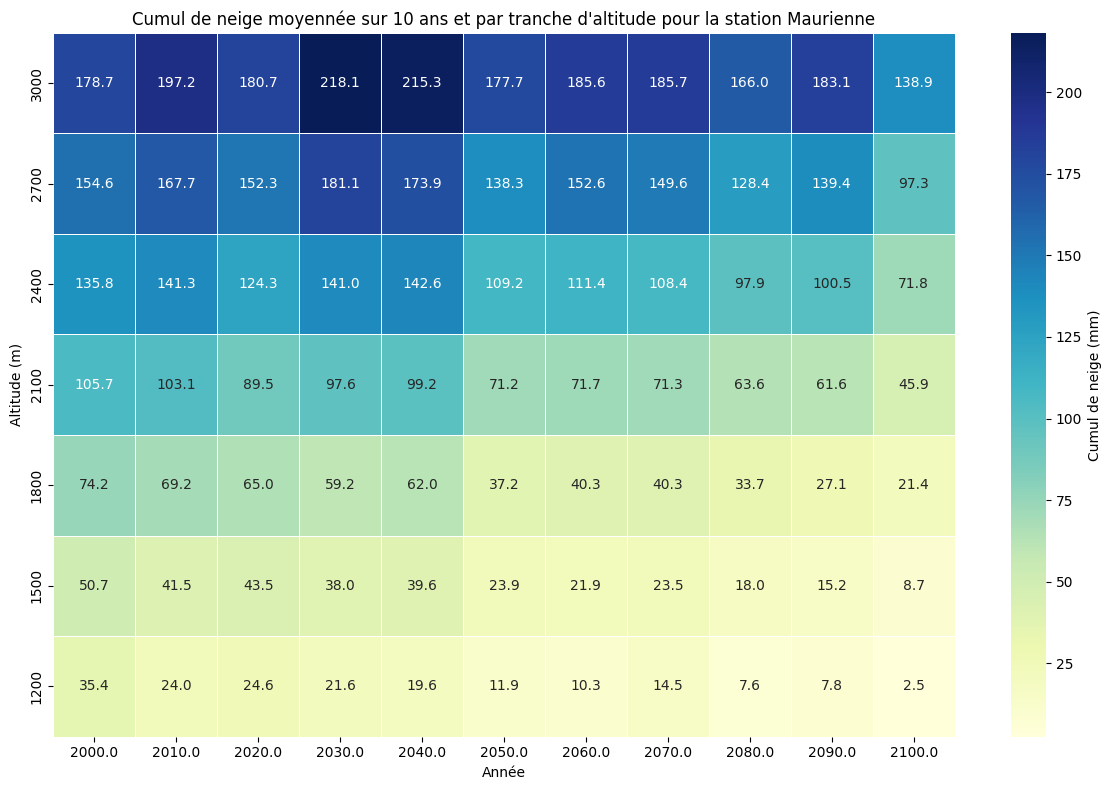

Matrice de l'enneigement pour la station 'Mont-Blanc' sauvegardée dans ../export/Matrice_Cumul_Neige_RCP/matrice_neige_station_RCP_Mont_Blanc.svg


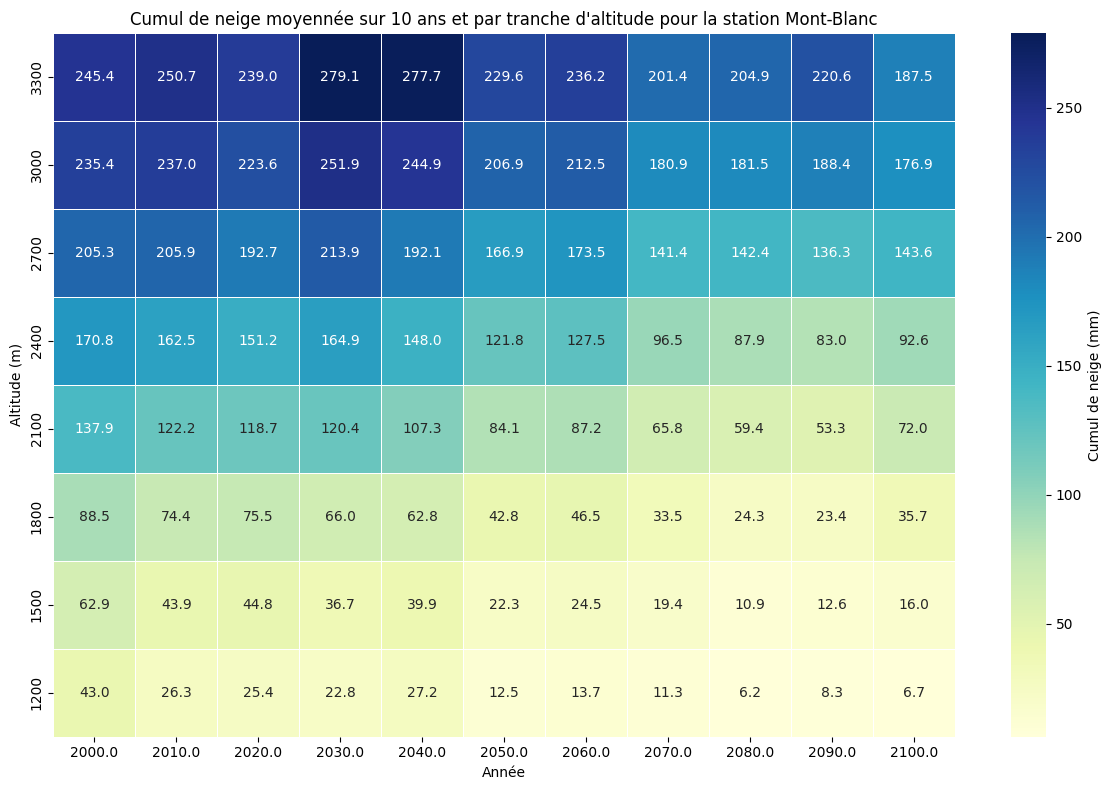

Matrice de l'enneigement pour la station 'Vanoise' sauvegardée dans ../export/Matrice_Cumul_Neige_RCP/matrice_neige_station_RCP_Vanoise.svg


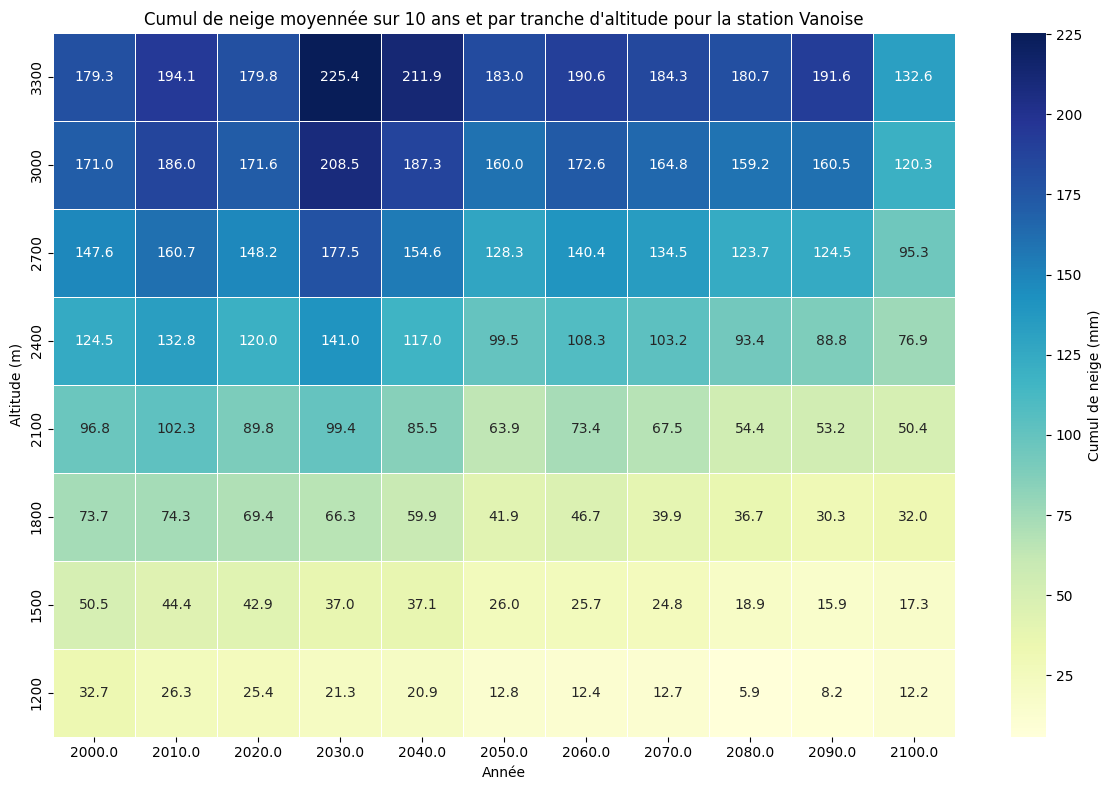

In [25]:
# Liste des stations uniques
stations = df_grouped['Libelle'].unique()

output_dir = "../export/Matrice_Cumul_Neige_RCP" 
os.makedirs(output_dir, exist_ok=True)

# Boucle pour traiter chaque station séparément
for station in stations:
    # Filtrer les données pour la station actuelle
    df_grouped_station = df_grouped[df_grouped['Libelle'] == station]

    # Créer une matrice de données où les lignes sont les altitudes, les colonnes sont les années,
    # et les valeurs sont les cumuls de neige
    df_grouped_pivot = df_grouped_station.pivot_table(
        index='Altitude',   # Tranches d'altitude en lignes
        columns='Annee_group',    # Années en colonnes
        values='SNDAV',     # Cumul de neige
        aggfunc='mean',     # Moyenne des cumuls de neige pour chaque combinaison
        fill_value=0        # Remplir les cases vides avec 0 si aucune donnée
    )

    # Trier les altitudes dans l'ordre croissant
    df_grouped_pivot = df_grouped_pivot.sort_index()

    # Inverser l'ordre des altitudes
    df_grouped_pivot = df_grouped_pivot.iloc[::-1]

    # Créer une figure
    plt.figure(figsize=(12, 8))

    # Tracer la heatmap
    sns.heatmap(df_grouped_pivot, cmap='YlGnBu', annot=True, fmt='.1f', linewidths=0.5, 
                cbar_kws={'label': 'Cumul de neige (mm)'})

    # Ajouter des labels et un titre
    plt.xlabel('Année')
    plt.ylabel('Altitude (m)')
    plt.title(f'Cumul de neige moyennée sur 10 ans et par tranche d\'altitude pour la station {station}')

    # Ajuster la mise en page
    plt.tight_layout()

    # Nom de fichier sécurisé pour la station 
    safe_station_name = "".join(c if c.isalnum() else "_" for c in station)
    
    # Chemin complet pour enregistrer le fichier SVG 
    output_path = os.path.join(output_dir, f"matrice_neige_station_RCP_{safe_station_name}.svg")
    
    try: 
        # Enregistrer la figure au format SVG avant de l'afficher
        plt.savefig(output_path, format='svg')
        print(f"Matrice de l'enneigement pour la station '{station}' sauvegardée dans {output_path}")
    except Exception as e: 
        print(f"Erreur lors de la sauvegarde de la matrice pour la station '{station}': {e}")
    
    # Afficher le graphique
    plt.show()
    
    # Fermer la figure pour éviter des conflits dans la boucle 
    plt.close()

### Température moyenne par tranche d'altitude 

In [26]:
# Vérifier les types de données et convertir si nécessaire
df['TAV'] = pd.to_numeric(df['TAV'], errors='coerce')

# Regrouper les données par 'Annee_group', 'Libelle' et 'Altitude'
df_grouped = df_filtered.groupby(['Annee_group', 'Libelle', 'Altitude'])['TAV']\
                                .mean().reset_index()

# Afficher le DataFrame groupé
print(df_grouped)

     Annee_group  Libelle  Altitude     TAV
0         2000.0   Aravis      1200  0.6200
1         2000.0   Aravis      1500 -0.2875
2         2000.0   Aravis      1800 -1.4025
3         2000.0   Aravis      2100 -2.8250
4         2000.0   Aravis      2400 -4.2625
..           ...      ...       ...     ...
677       2100.0  Vanoise      2100  1.4500
678       2100.0  Vanoise      2400  0.1100
679       2100.0  Vanoise      2700 -1.3600
680       2100.0  Vanoise      3000 -2.8000
681       2100.0  Vanoise      3300 -4.5200

[682 rows x 4 columns]


Matrice de température pour la station 'Aravis' sauvegardée dans ../export/Matrice_Temperature_RCP/matrice_temp_station_RCP_Aravis.svg


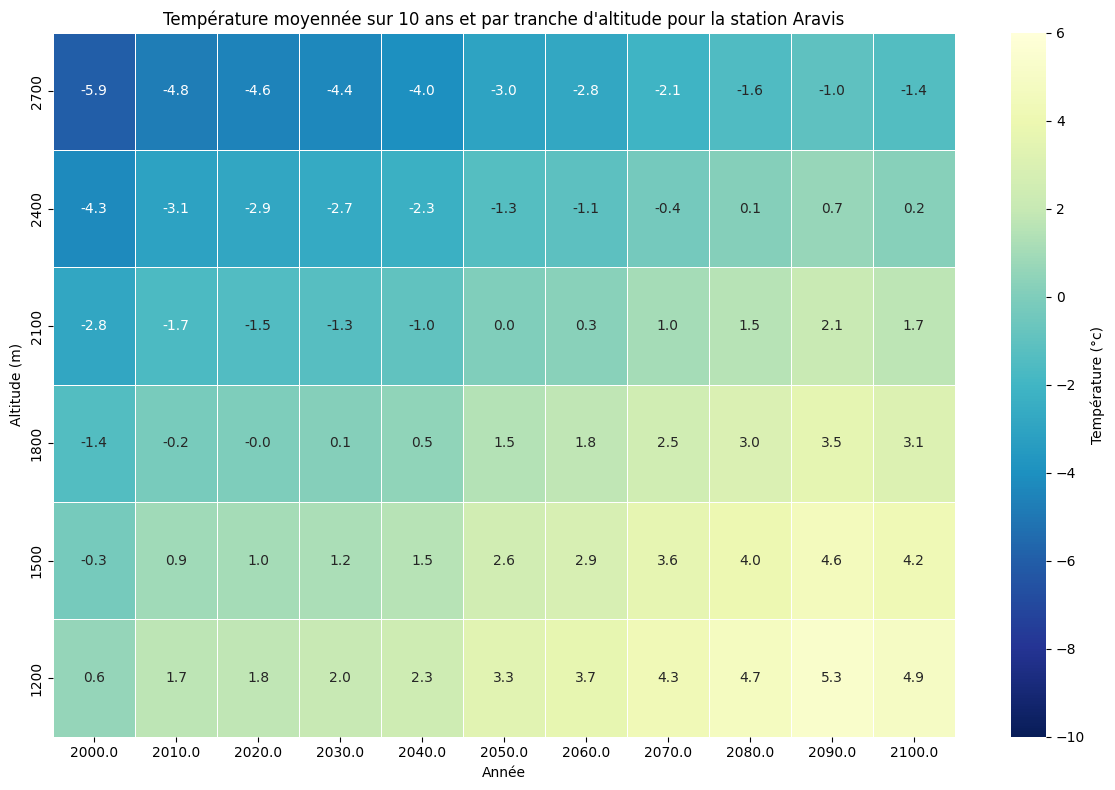

Matrice de température pour la station 'Bauges' sauvegardée dans ../export/Matrice_Temperature_RCP/matrice_temp_station_RCP_Bauges.svg


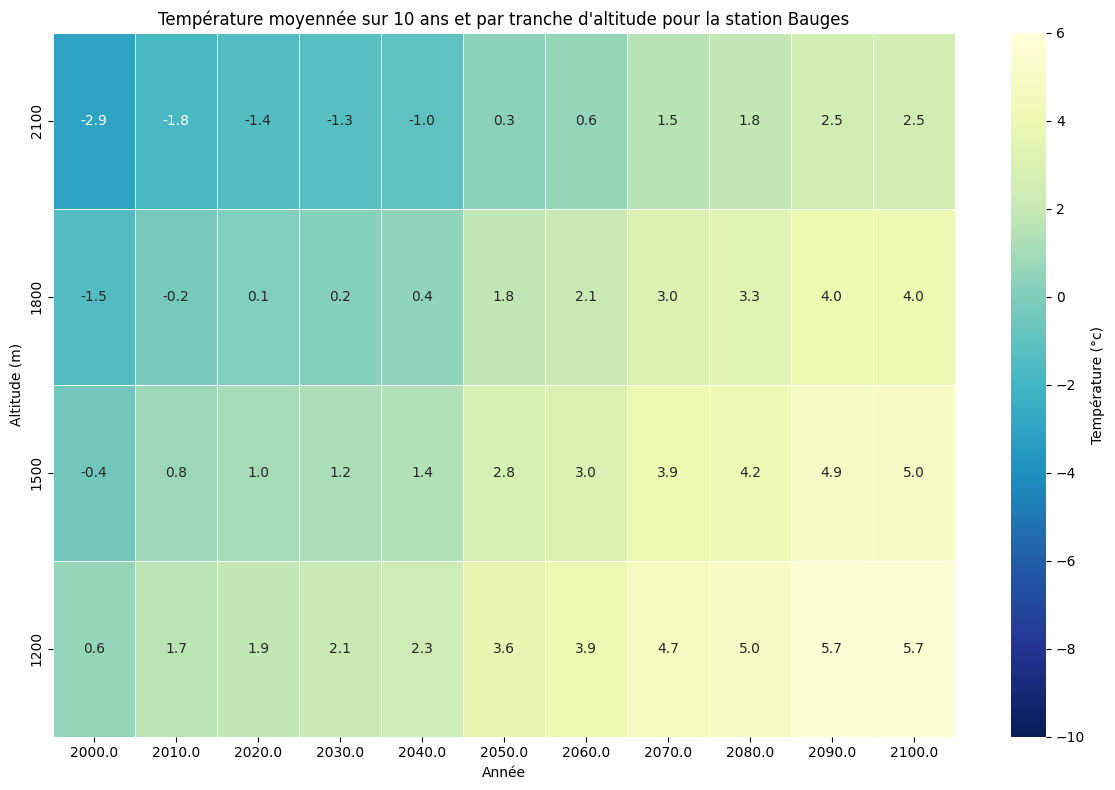

Matrice de température pour la station 'Beaufortain' sauvegardée dans ../export/Matrice_Temperature_RCP/matrice_temp_station_RCP_Beaufortain.svg


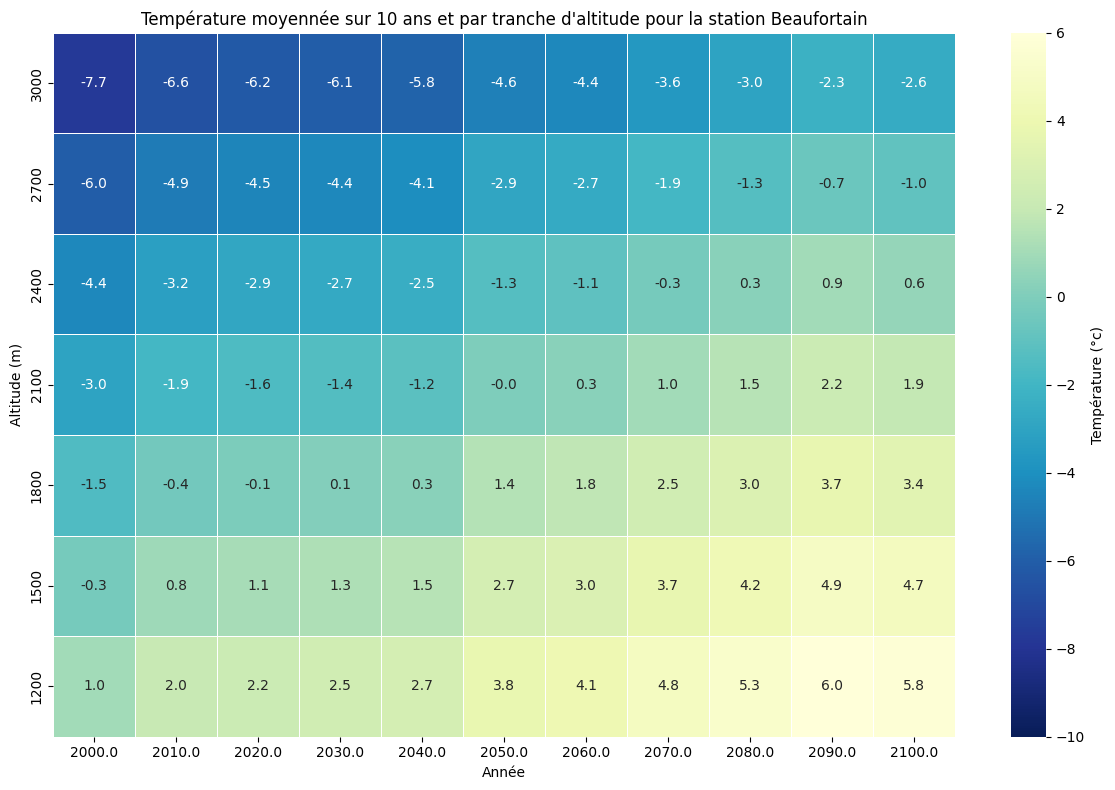

Matrice de température pour la station 'Chablais' sauvegardée dans ../export/Matrice_Temperature_RCP/matrice_temp_station_RCP_Chablais.svg


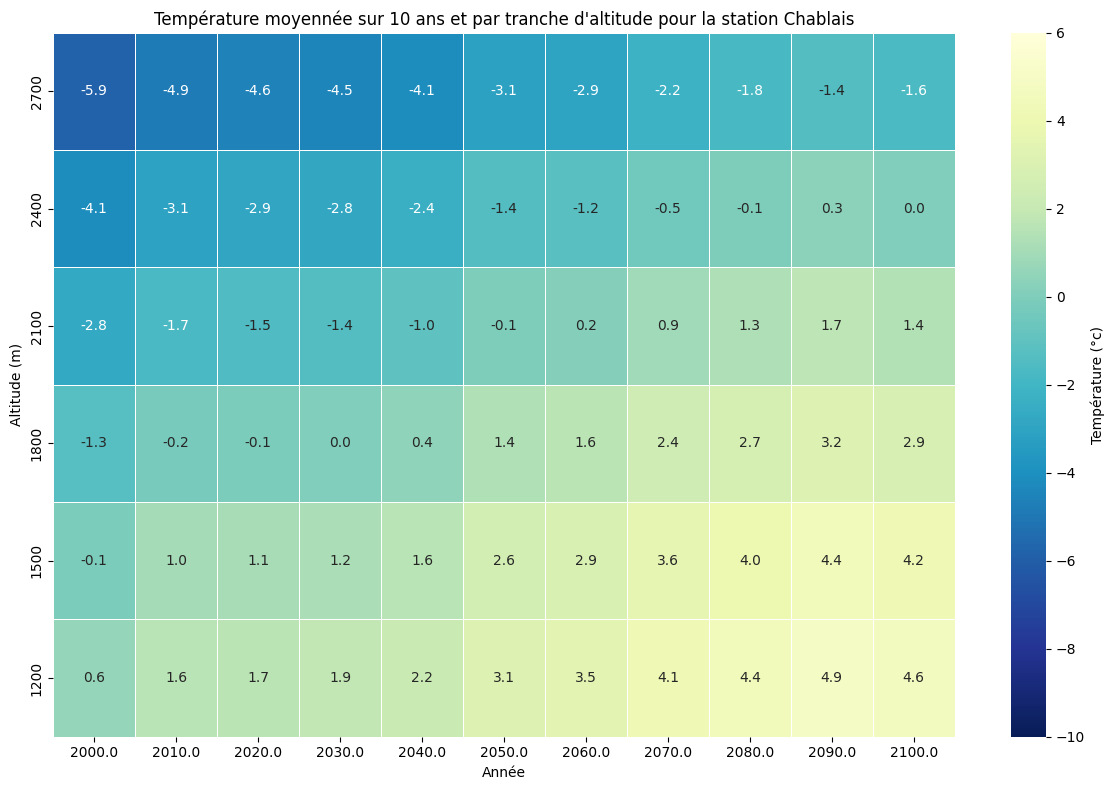

Matrice de température pour la station 'Haute-Maurienne' sauvegardée dans ../export/Matrice_Temperature_RCP/matrice_temp_station_RCP_Haute_Maurienne.svg


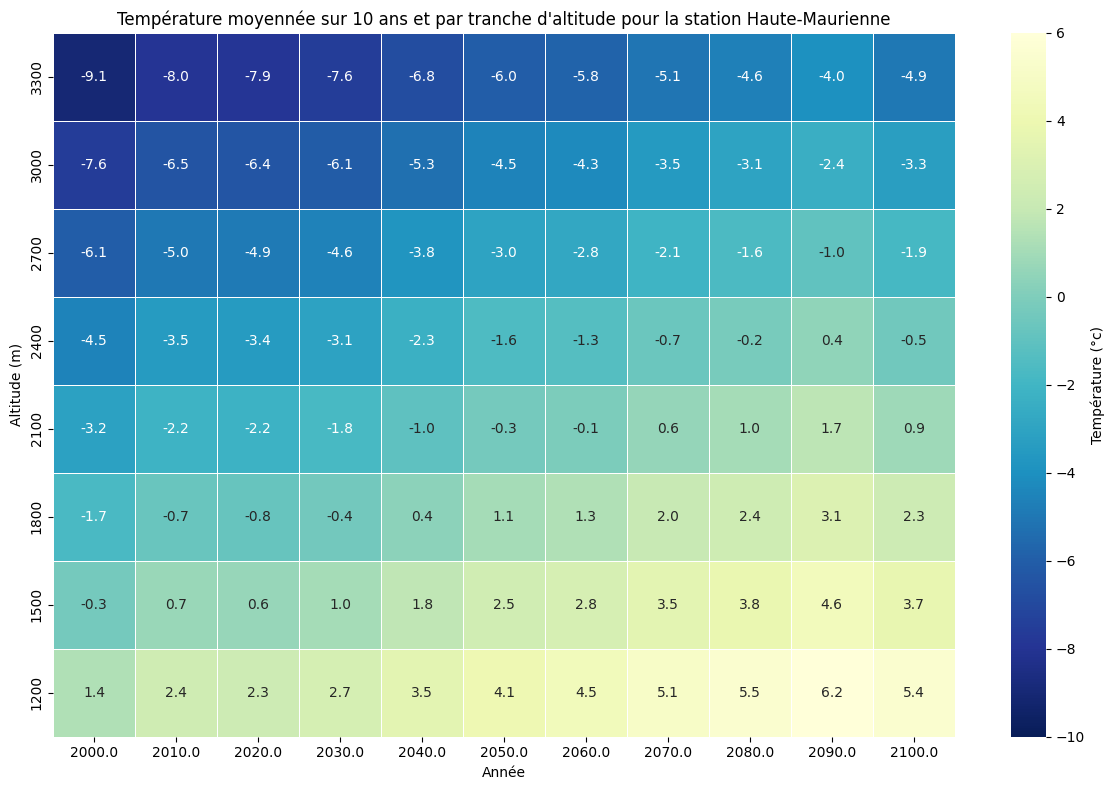

Matrice de température pour la station 'Haute-Tarentaise' sauvegardée dans ../export/Matrice_Temperature_RCP/matrice_temp_station_RCP_Haute_Tarentaise.svg


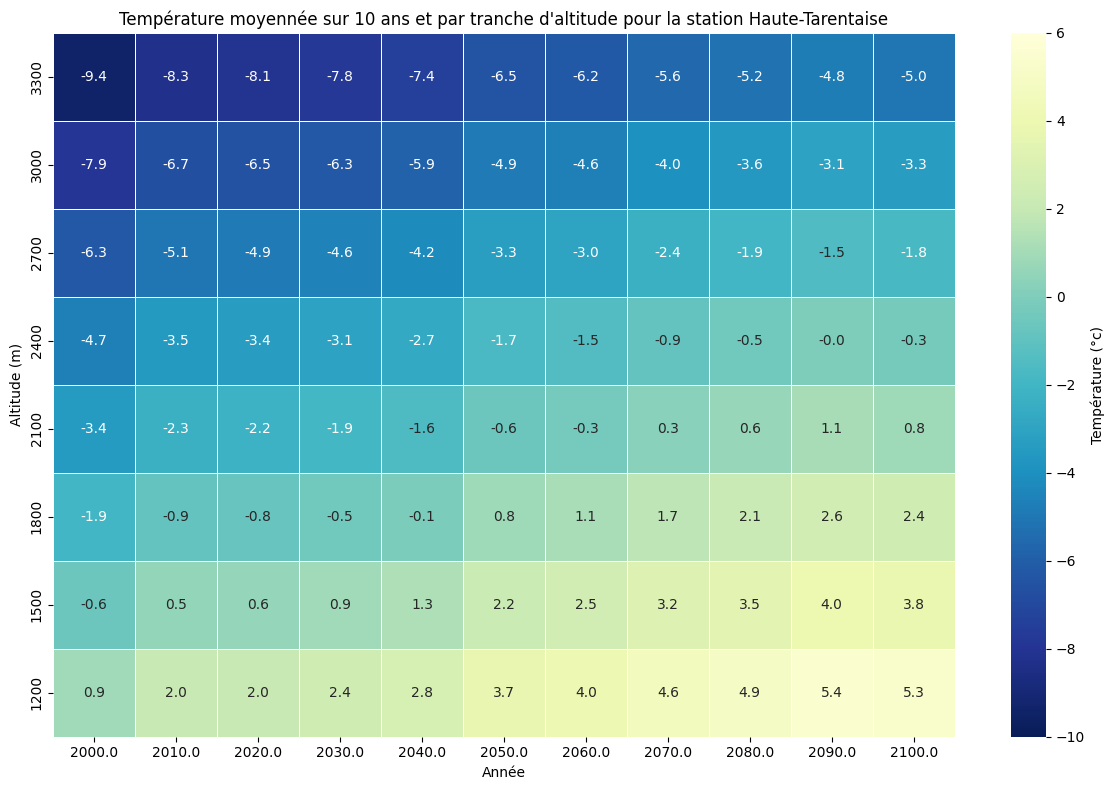

Matrice de température pour la station 'Maurienne' sauvegardée dans ../export/Matrice_Temperature_RCP/matrice_temp_station_RCP_Maurienne.svg


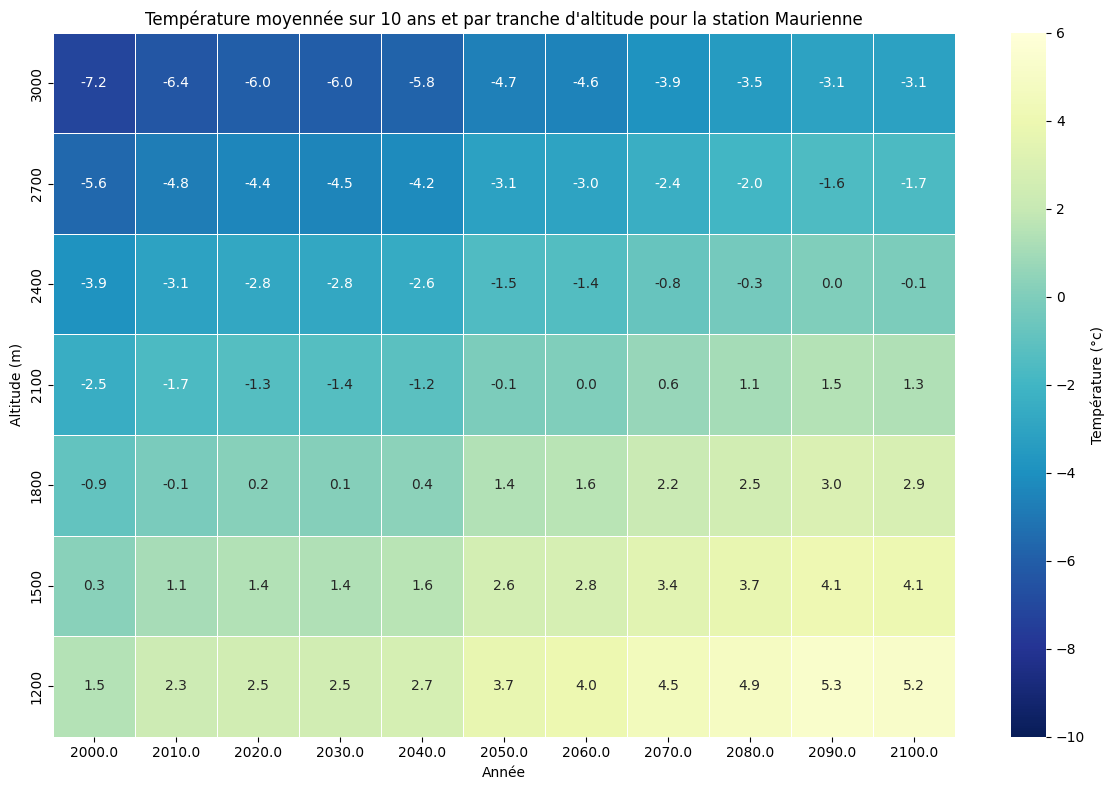

Matrice de température pour la station 'Mont-Blanc' sauvegardée dans ../export/Matrice_Temperature_RCP/matrice_temp_station_RCP_Mont_Blanc.svg


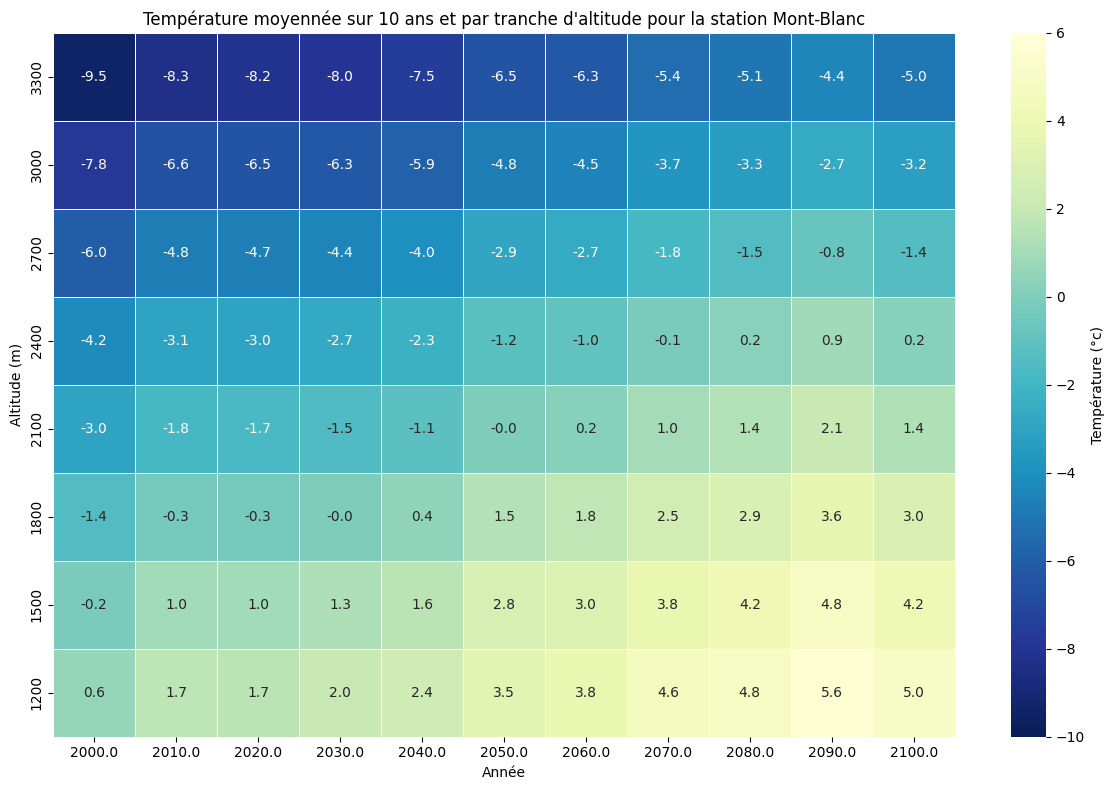

Matrice de température pour la station 'Vanoise' sauvegardée dans ../export/Matrice_Temperature_RCP/matrice_temp_station_RCP_Vanoise.svg


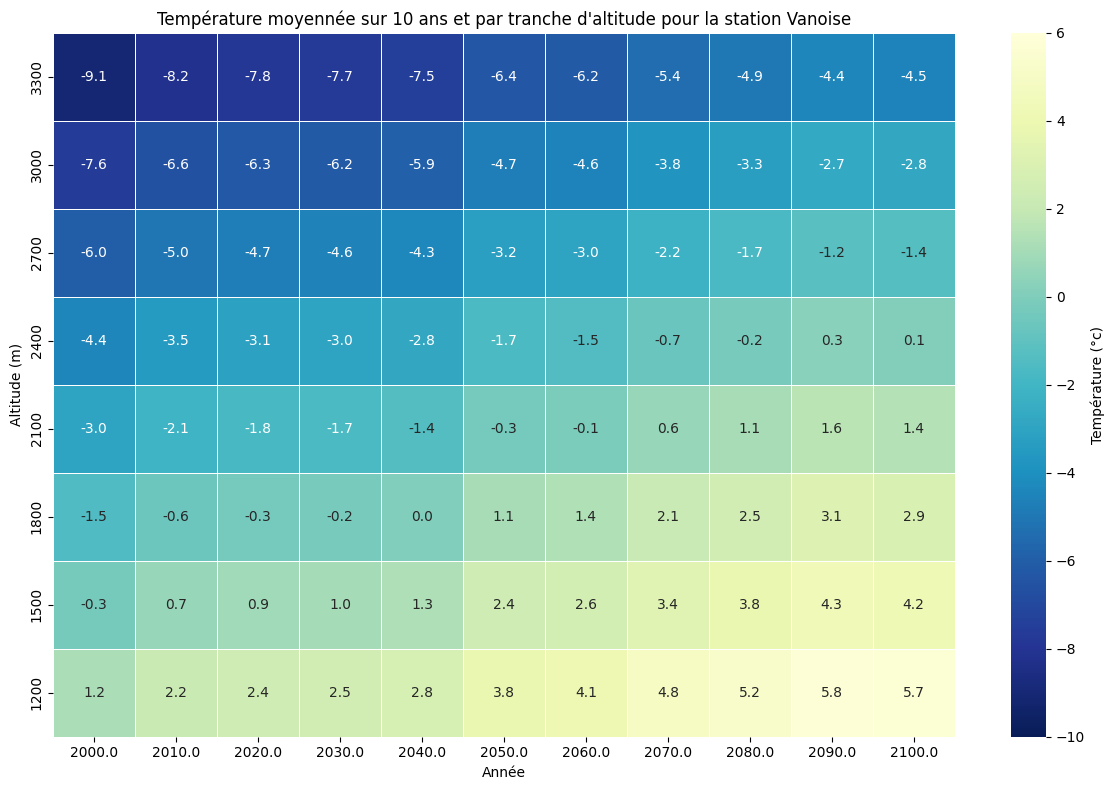

In [27]:
# Liste des stations uniques
stations = df_grouped['Libelle'].unique()

output_dir = "../export/Matrice_Temperature_RCP" 
os.makedirs(output_dir, exist_ok=True)

# Boucle pour traiter chaque station séparément
for station in stations:
    # Filtrer les données pour la station actuelle
    df_grouped_station = df_grouped[df_grouped['Libelle'] == station]

    # Créer une matrice de données où les lignes sont les altitudes, les colonnes sont les années,
    # et les valeurs sont les cumuls de neige
    df_grouped_pivot = df_grouped_station.pivot_table(
        index='Altitude',   # Tranches d'altitude en lignes
        columns='Annee_group',    # Années en colonnes
        values='TAV',     # Température
        aggfunc='mean',     # Moyenne des cumuls de neige pour chaque combinaison
        fill_value=0        # Remplir les cases vides avec 0 si aucune donnée
    )

    # Trier les altitudes dans l'ordre croissant
    df_grouped_pivot = df_grouped_pivot.sort_index()

    # Inverser l'ordre des altitudes
    df_grouped_pivot = df_grouped_pivot.iloc[::-1]

    # Créer une figure
    plt.figure(figsize=(12, 8))

    # Tracer la heatmap
    sns.heatmap(
        df_grouped_pivot,
        cmap='YlGnBu_r',      # Palette inversée
        annot=True,
        fmt='.1f',
        linewidths=0.5,
        cbar_kws={'label': 'Température (°c)'},
        vmin=-10,             # Valeur minimale pour la légende
        vmax=6               # Valeur maximale pour la légende
    )

    # Ajouter des labels et un titre
    plt.xlabel('Année')
    plt.ylabel('Altitude (m)')
    plt.title(f'Température moyennée sur 10 ans et par tranche d\'altitude pour la station {station}')

    # Ajuster la mise en page
    plt.tight_layout()

    # Nom de fichier sécurisé pour la station 
    safe_station_name = "".join(c if c.isalnum() else "_" for c in station)
    
    # Chemin complet pour enregistrer le fichier SVG 
    output_path = os.path.join(output_dir, f"matrice_temp_station_RCP_{safe_station_name}.svg")
    
    try: 
        # Enregistrer la figure au format SVG avant de l'afficher
        plt.savefig(output_path, format='svg')
        print(f"Matrice de température pour la station '{station}' sauvegardée dans {output_path}")
    except Exception as e: 
        print(f"Erreur lors de la sauvegarde de la matrice pour la station '{station}': {e}")
    
    # Afficher le graphique
    plt.show()
    
    # Fermer la figure pour éviter des conflits dans la boucle 
    plt.close()  

## Enregistrement du dataframe en json

In [28]:
# Enregistrer le DataFrame en JSON dans un fichier nommé 'data.json'
df.to_json('../export/data_rcp.json', orient='records')